<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_corrected_division.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from scipy.optimize import minimize

[422000000, 442000000, 462000000, 482000000, 502000000, 522000000, 542000000, 562000000, 582000000, 602000000, 622000000, 642000000, 662000000, 682000000, 702000000, 722000000, 742000000, 762000000, 782000000, 802000000, 822000000, 842000000, 862000000, 882000000, 902000000, 922000000, 942000000, 962000000, 982000000, 1002000000, 1022000000, 1042000000, 1062000000, 1082000000, 1102000000, 1122000000, 1142000000, 1162000000, 1182000000, 1202000000, 1222000000, 1242000000, 1262000000, 1282000000, 1302000000, 1322000000, 1342000000, 1362000000, 1382000000, 1402000000, 1422000000, 1442000000, 1462000000, 1482000000, 1502000000, 1522000000, 1542000000, 1562000000, 1582000000, 1602000000]
422000000


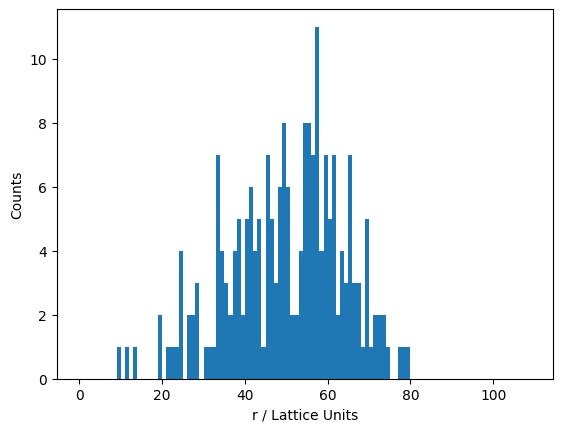

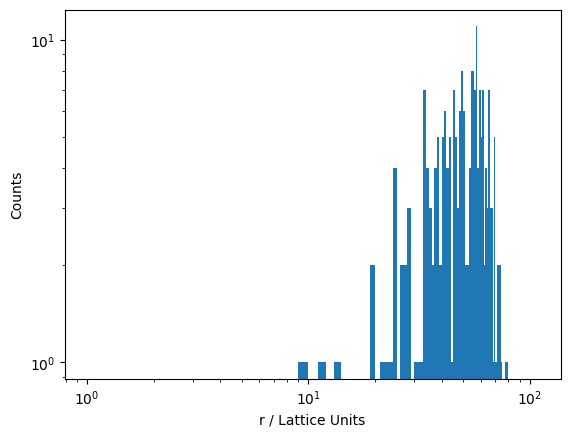

442000000


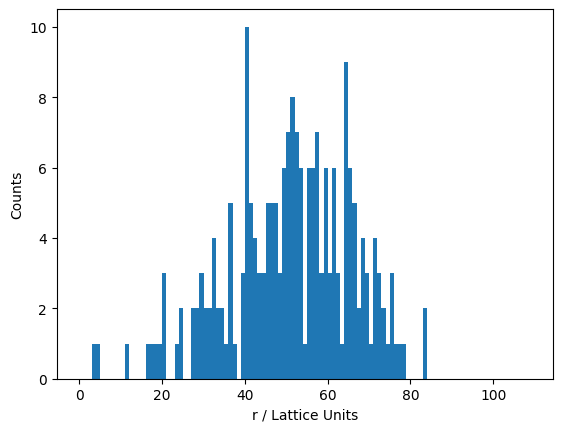

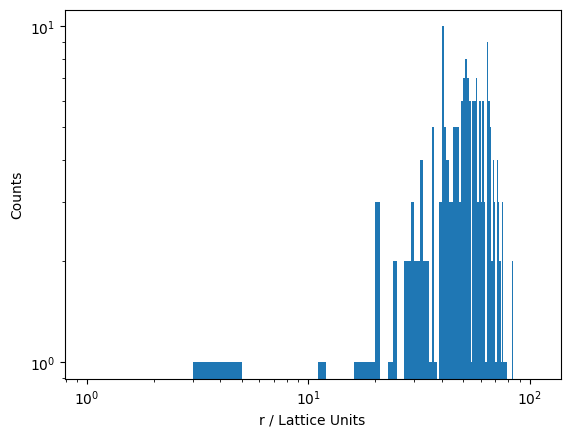

462000000


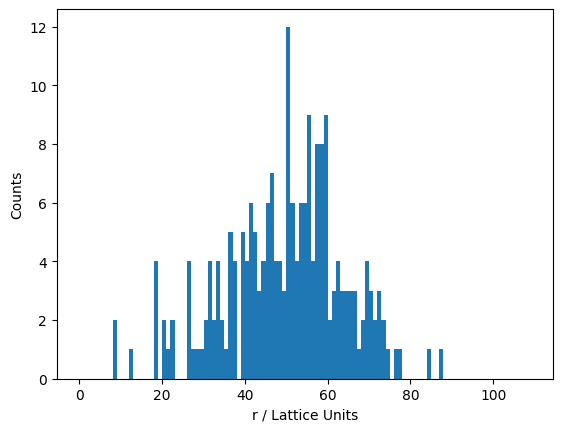

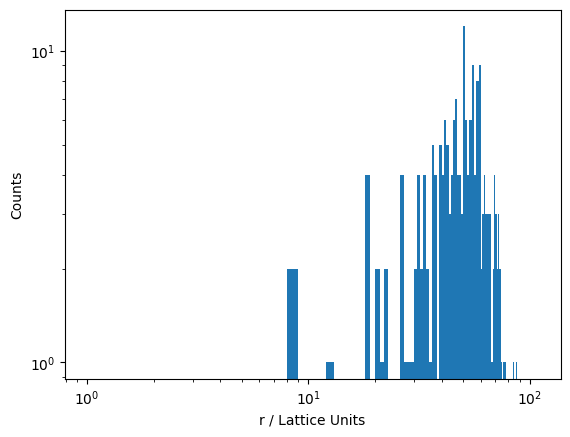

482000000


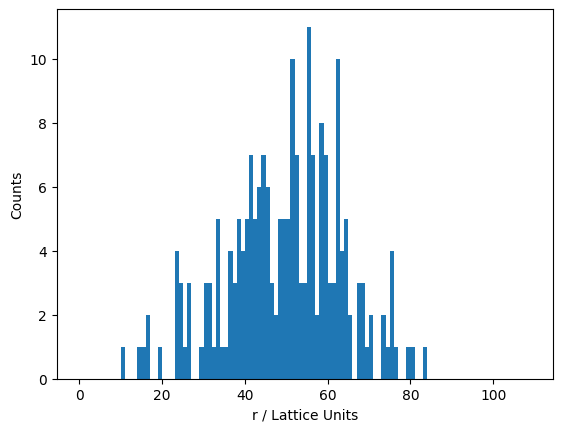

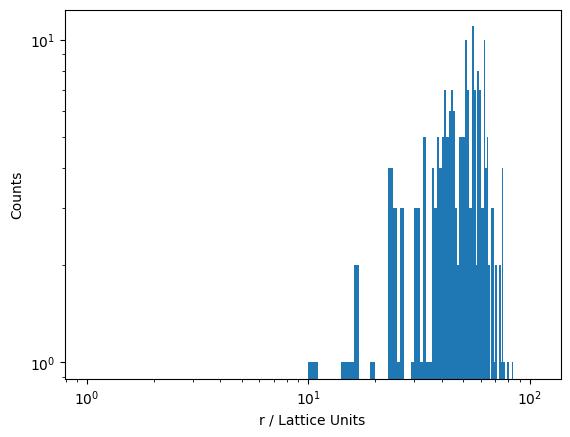

502000000


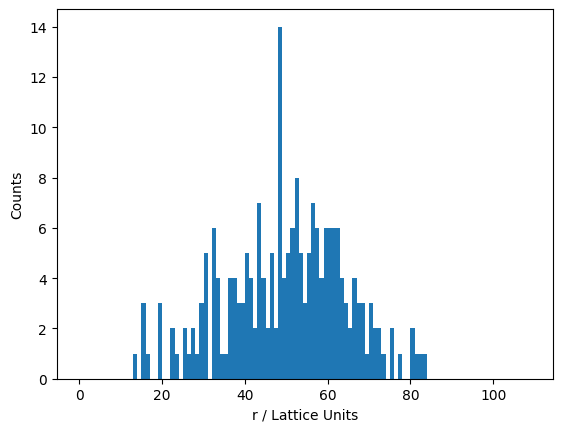

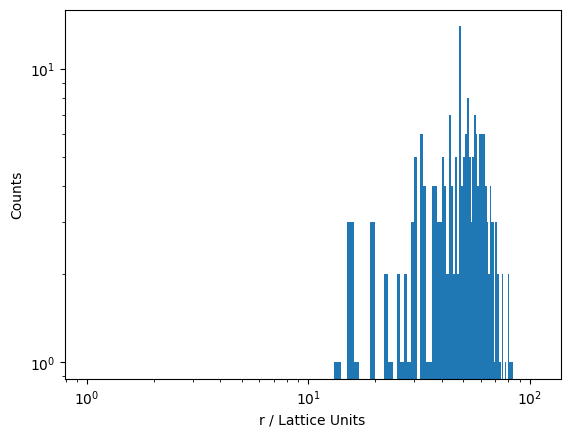

522000000


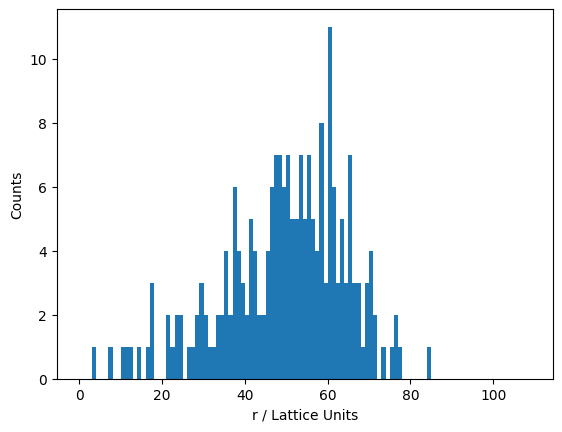

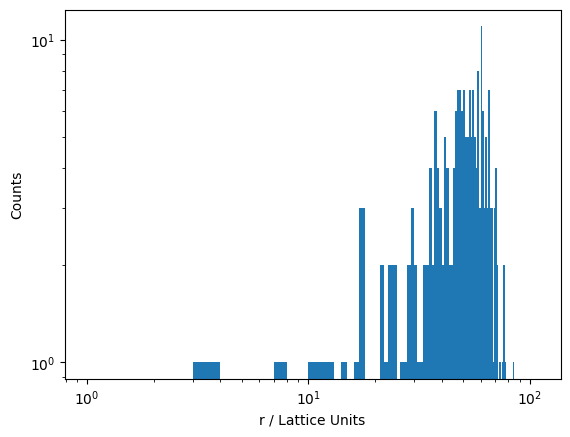

542000000


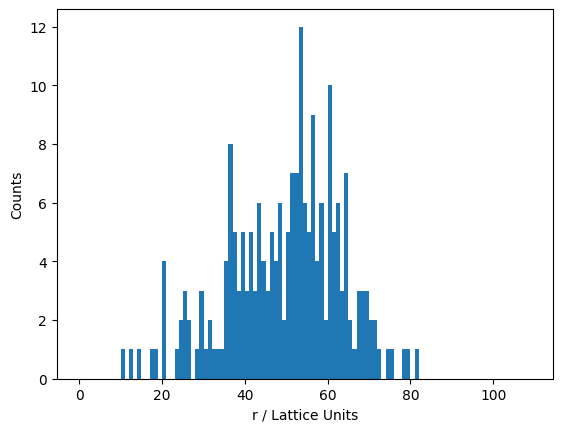

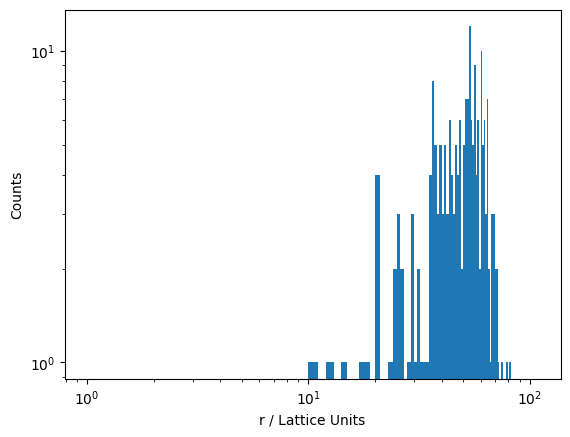

562000000


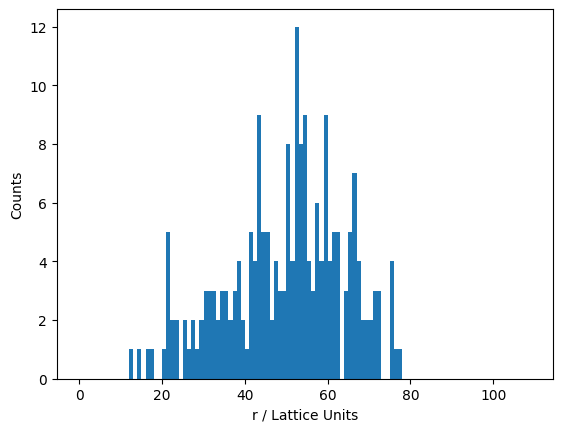

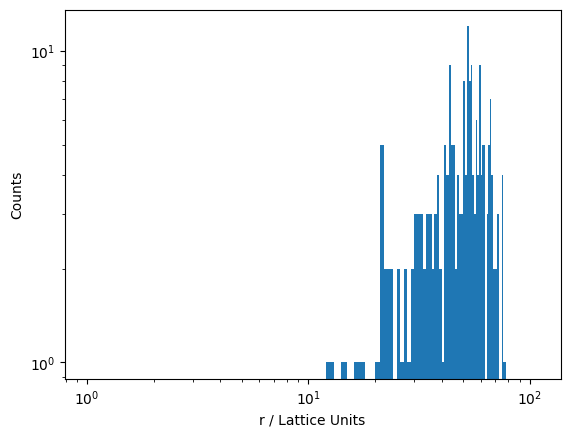

582000000


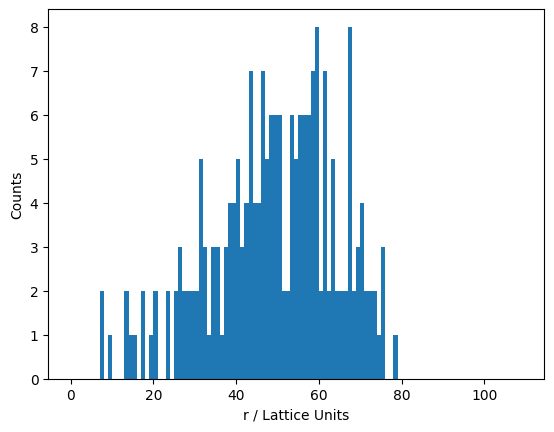

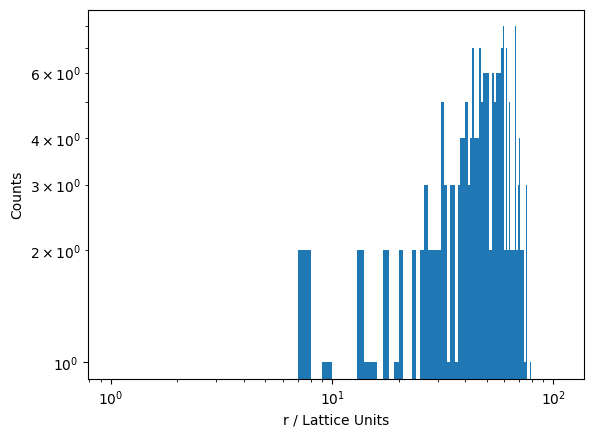

602000000


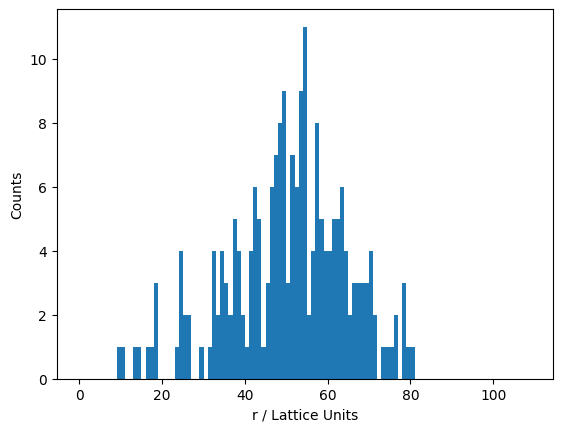

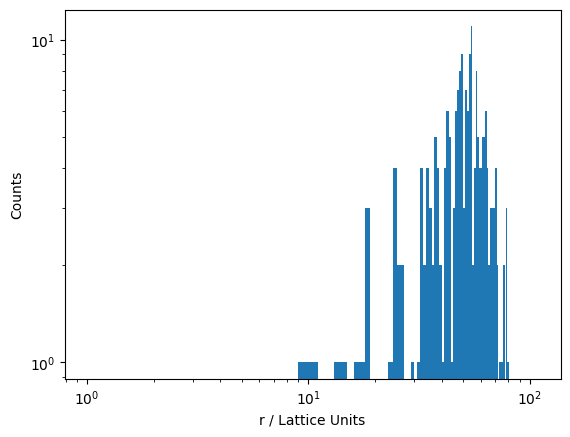

622000000


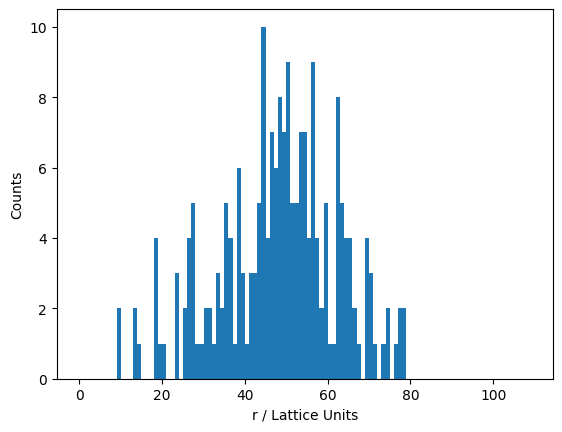

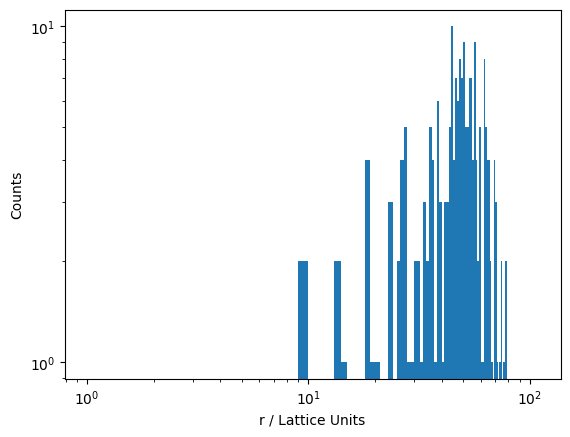

642000000


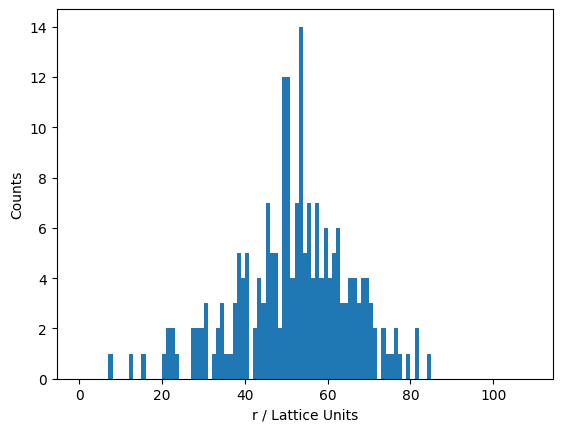

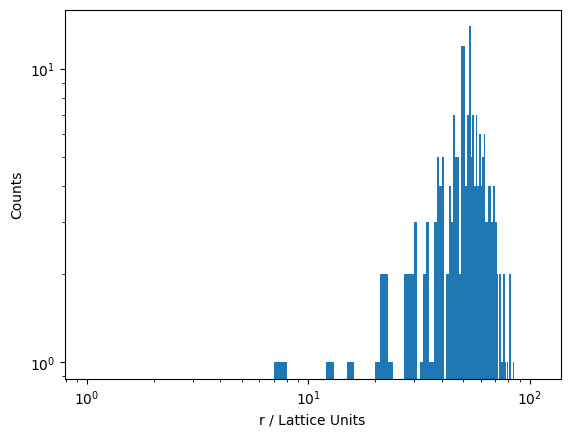

662000000


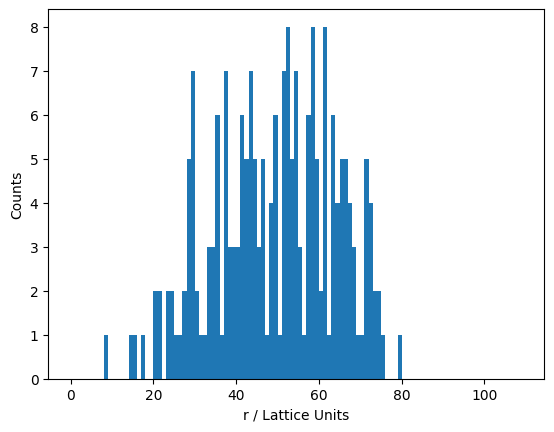

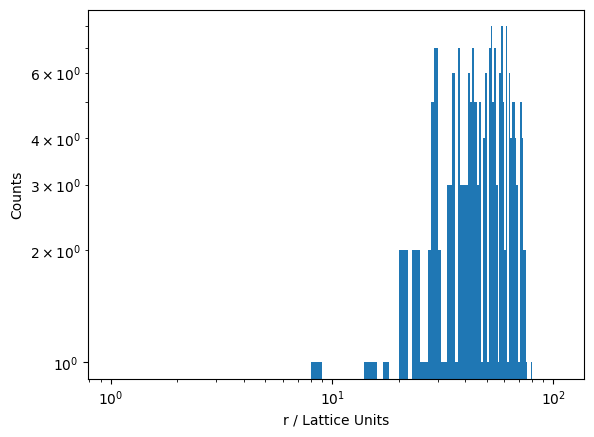

682000000


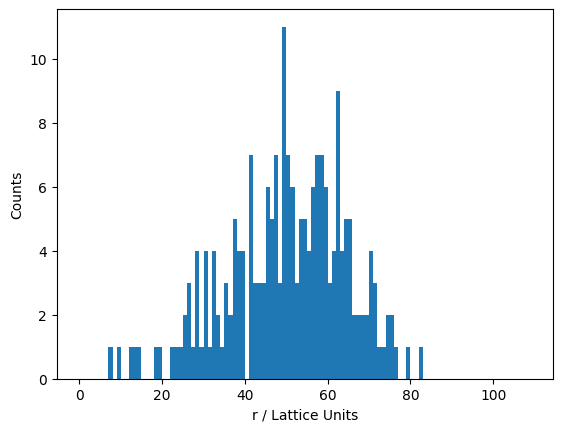

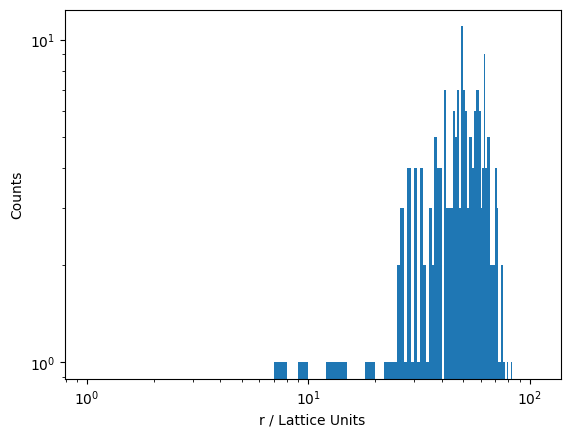

702000000


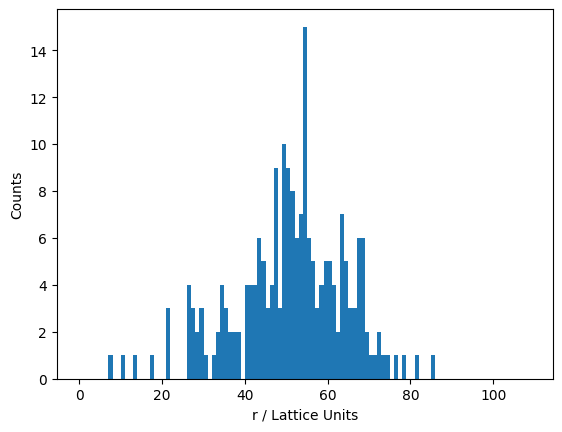

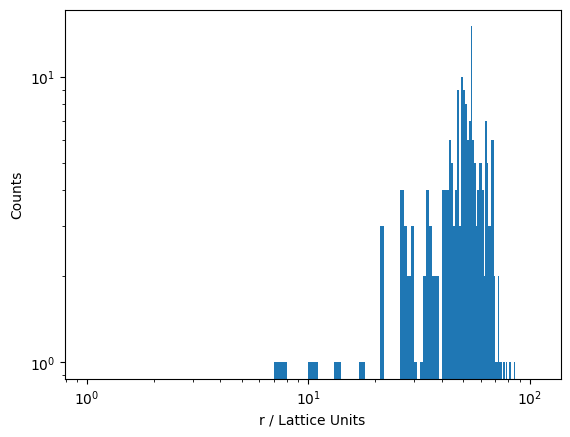

722000000


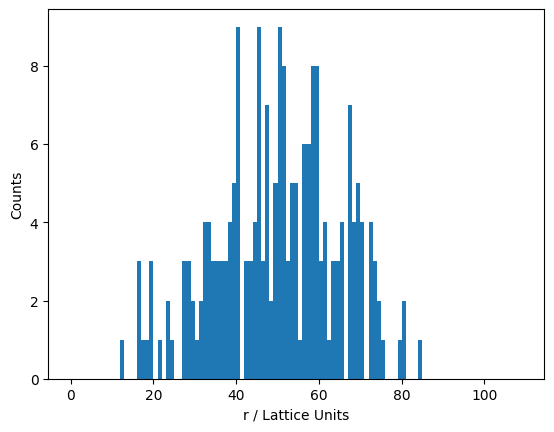

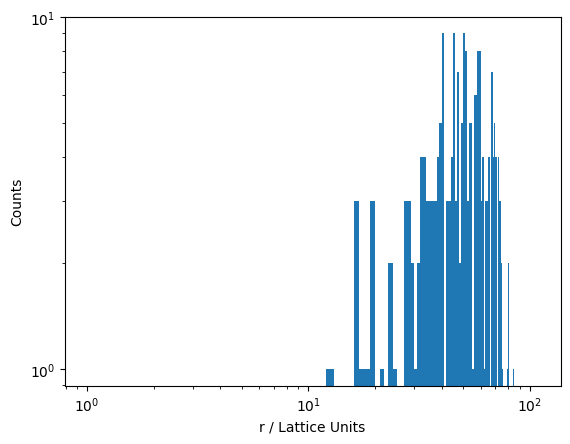

742000000


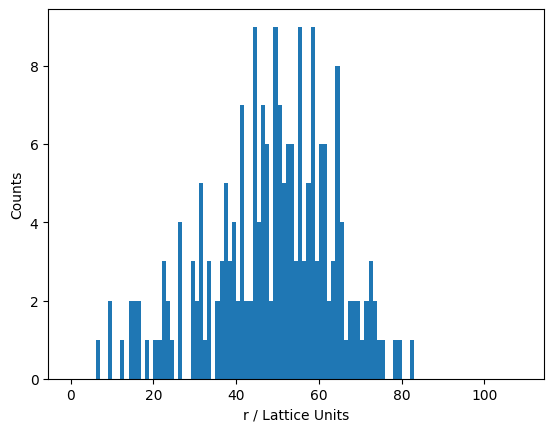

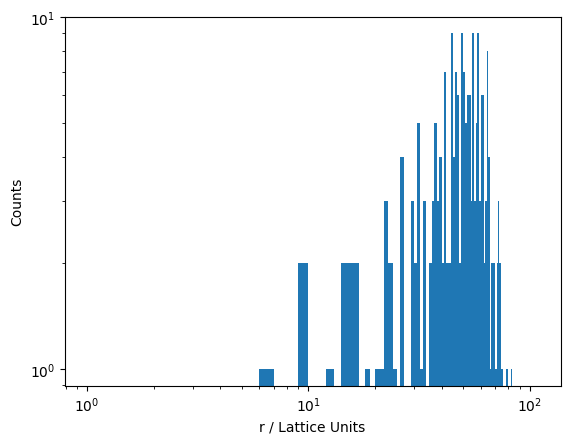

762000000


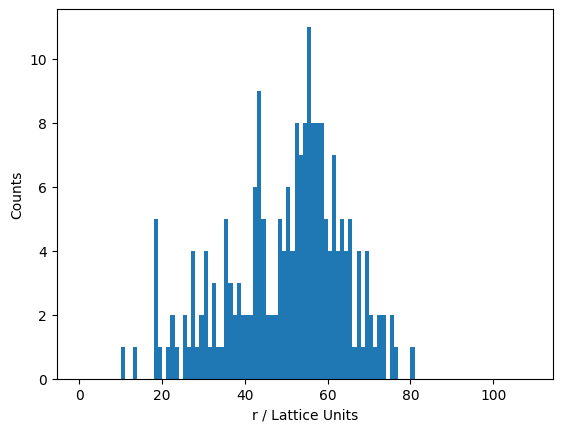

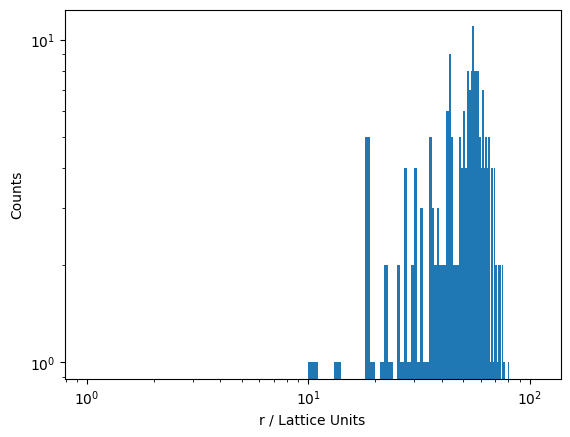

782000000


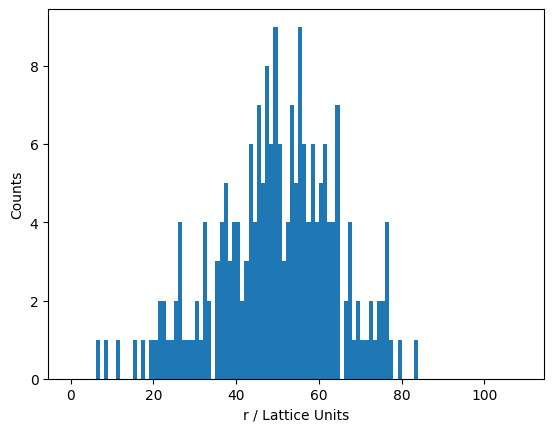

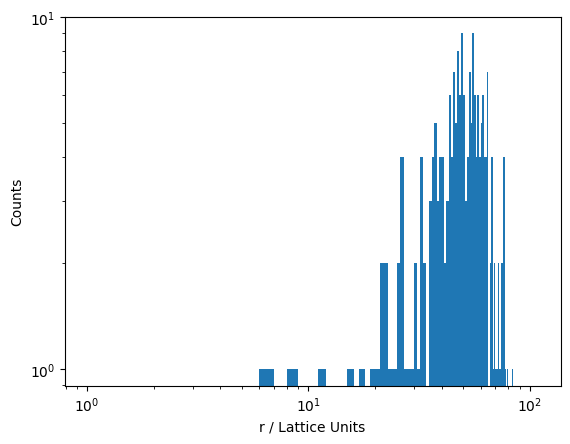

802000000


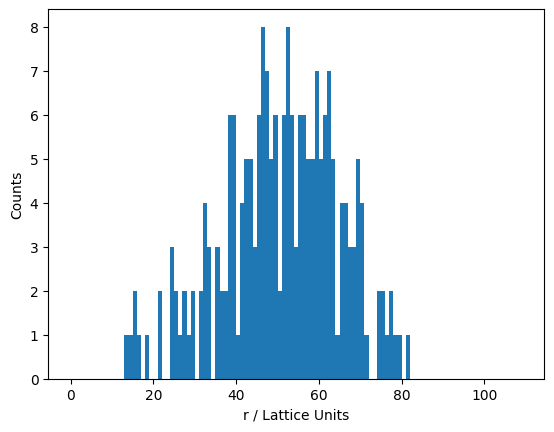

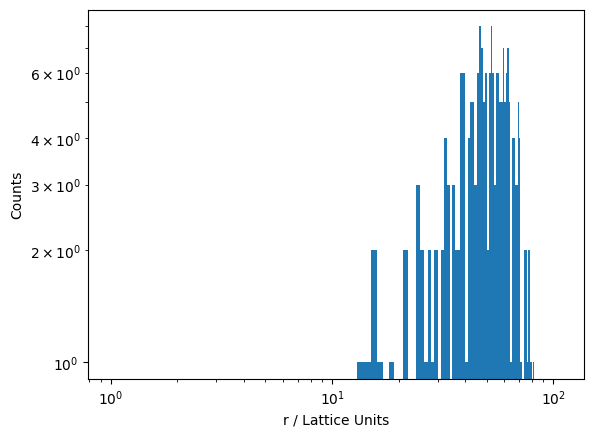

822000000


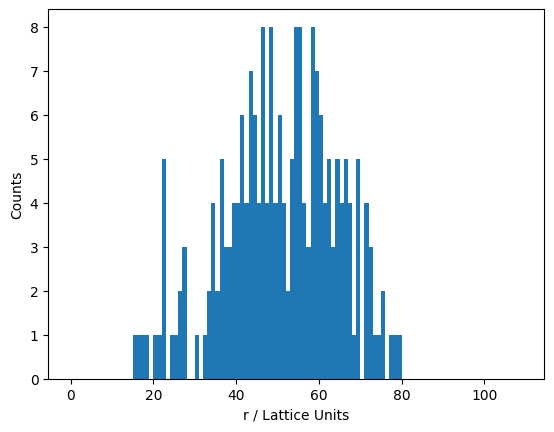

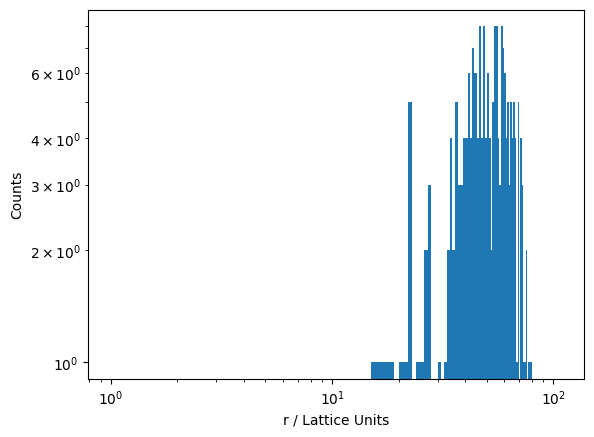

842000000


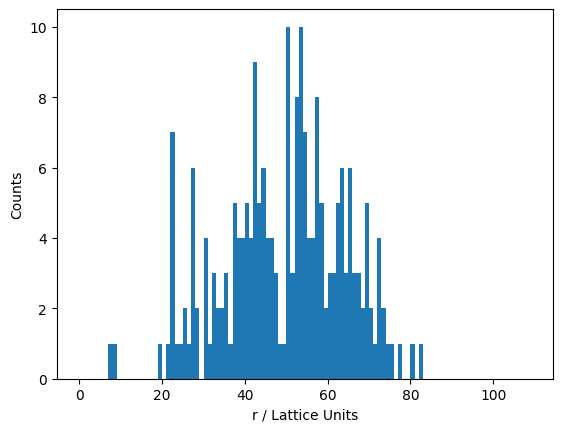

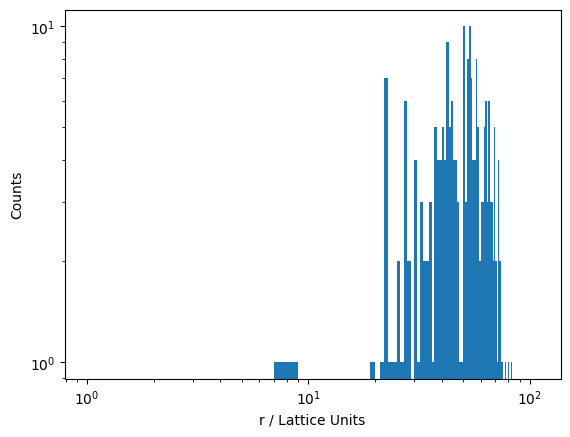

862000000


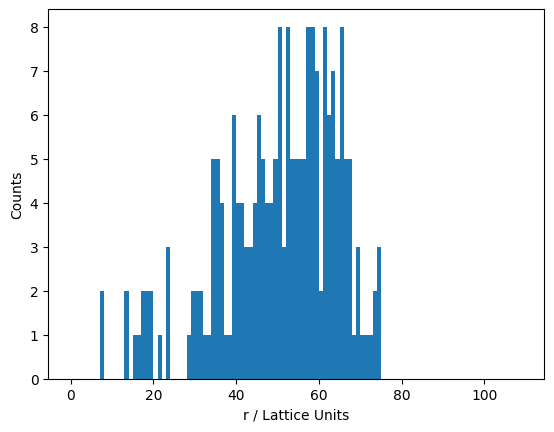

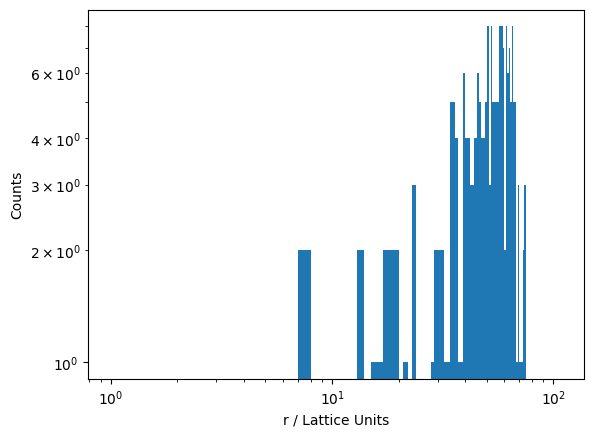

882000000


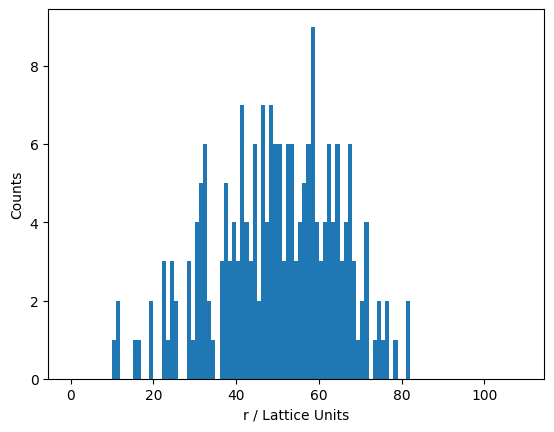

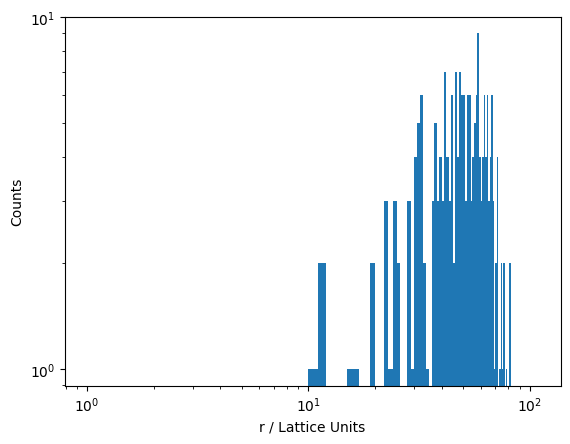

902000000


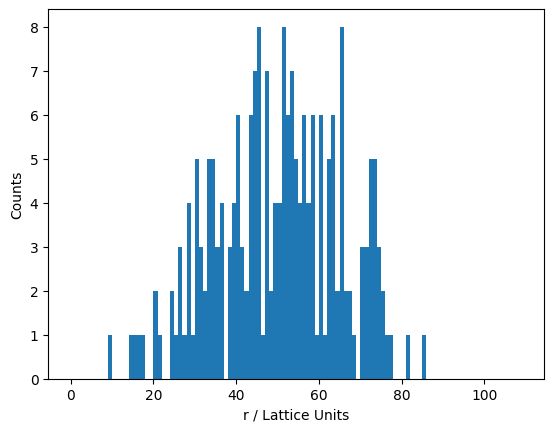

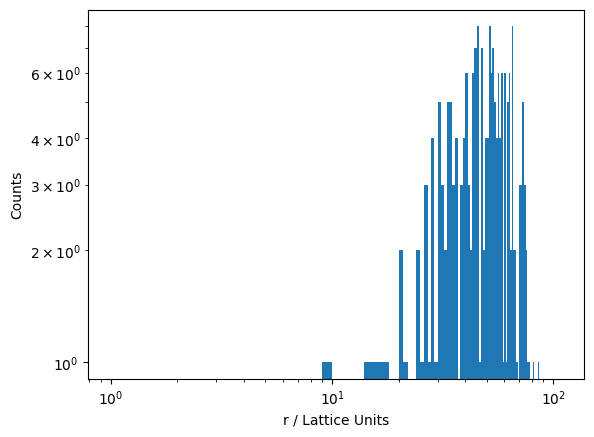

922000000


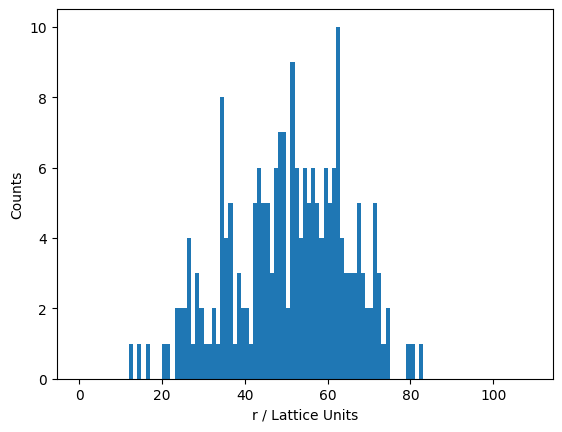

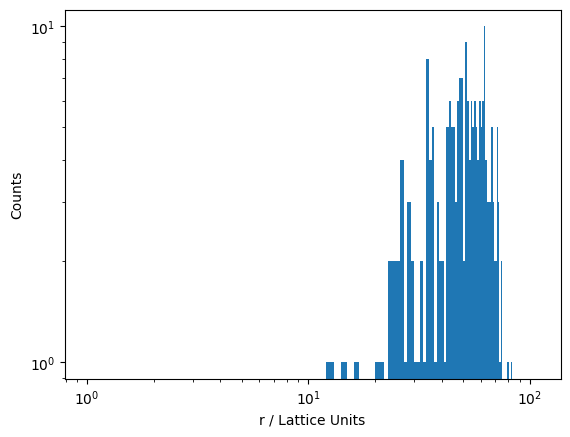

942000000


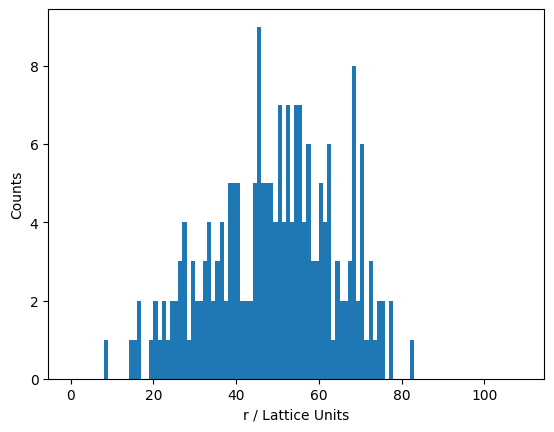

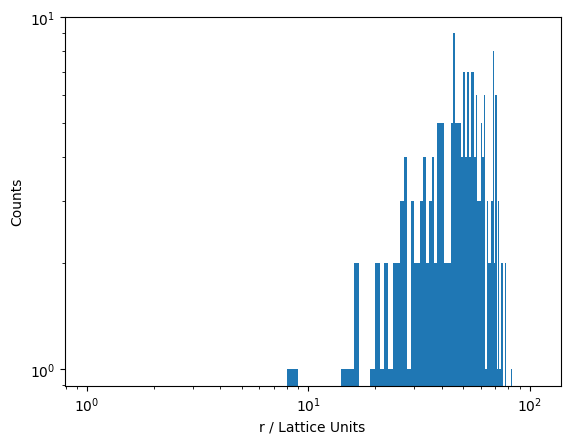

962000000


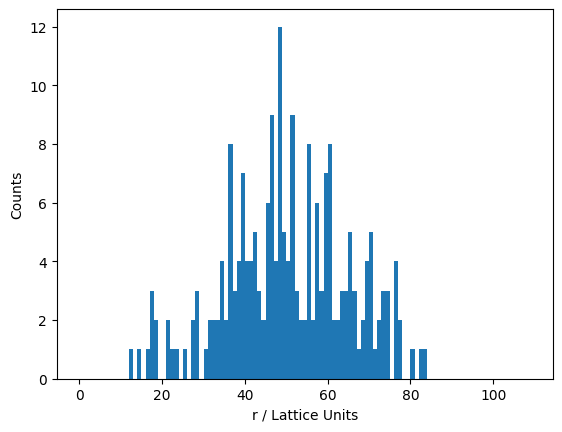

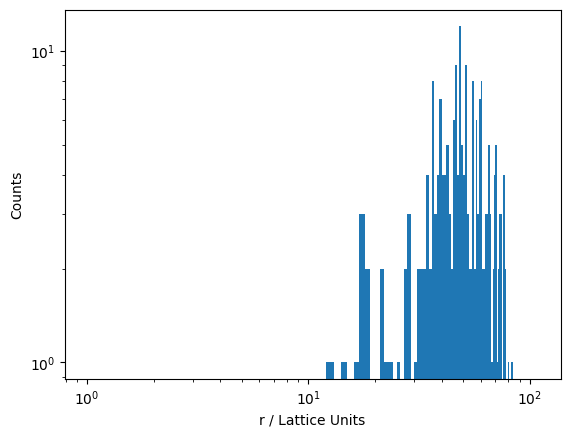

982000000


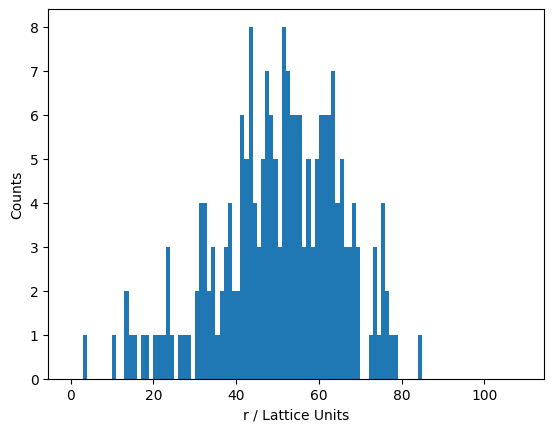

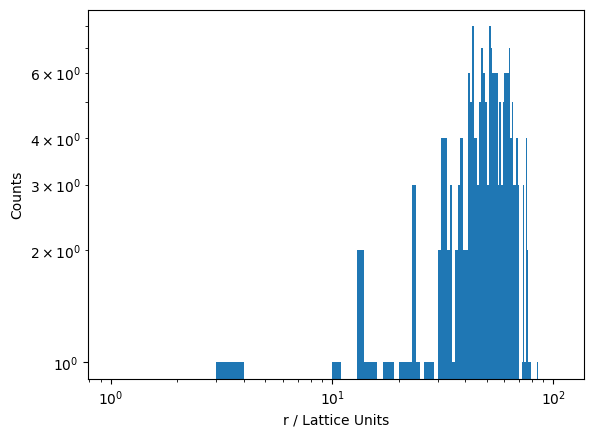

1002000000


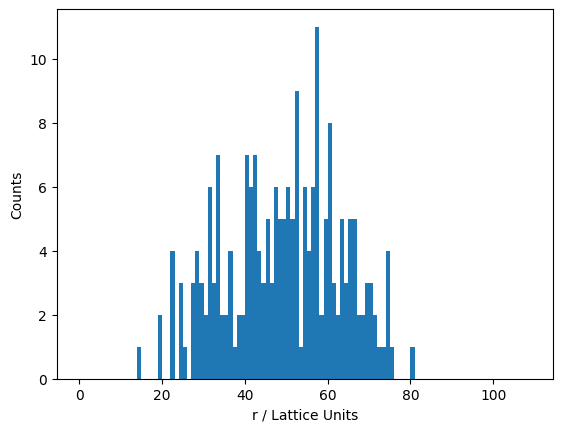

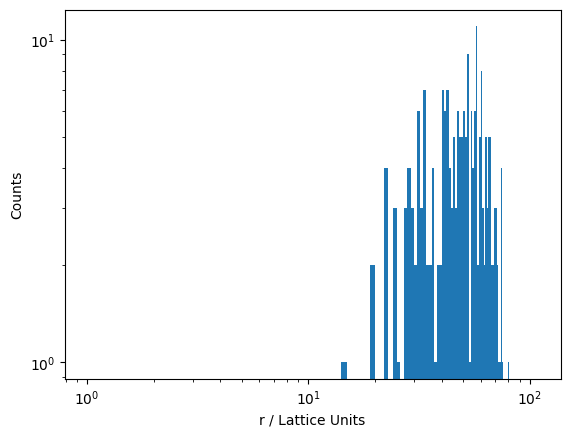

1022000000


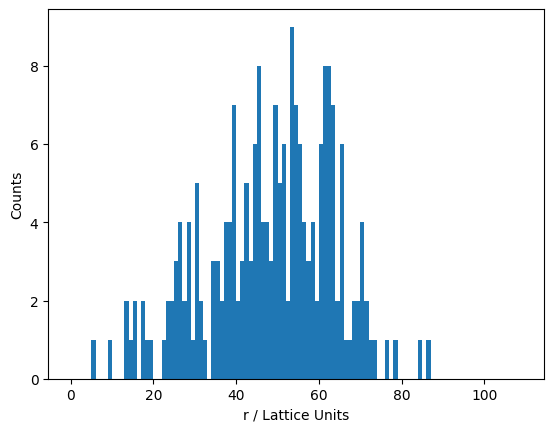

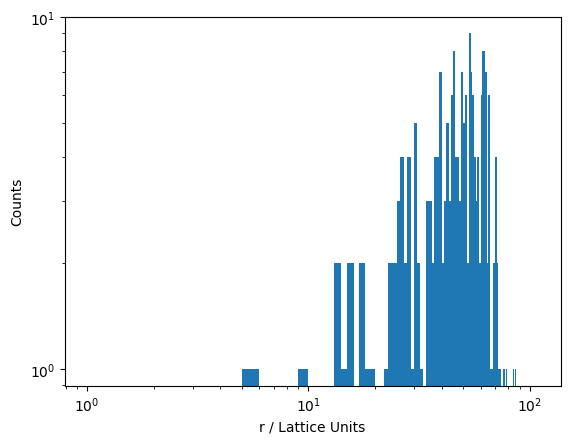

1042000000


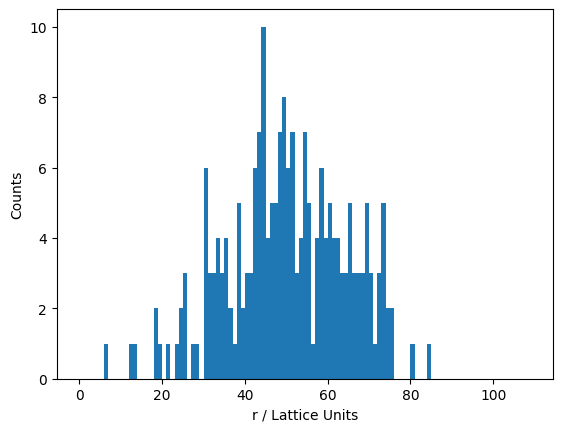

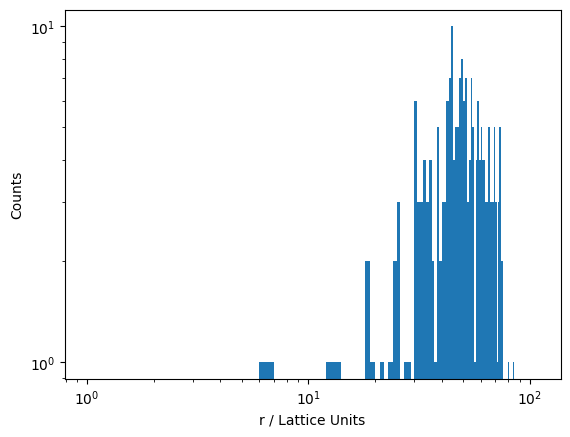

1062000000


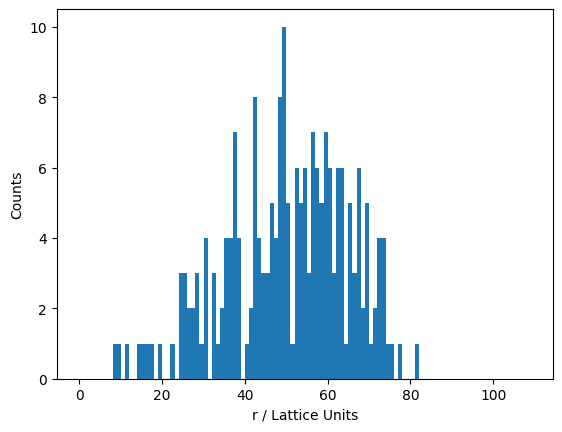

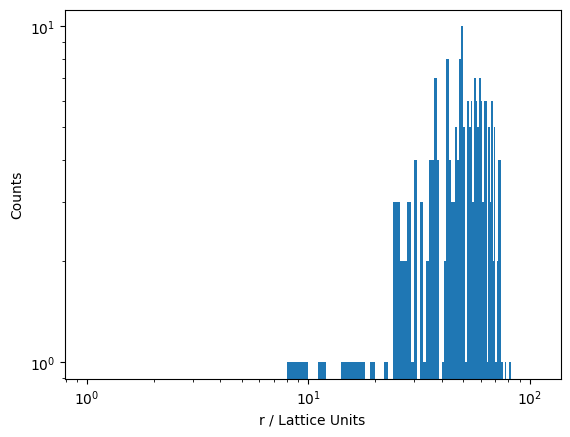

1082000000


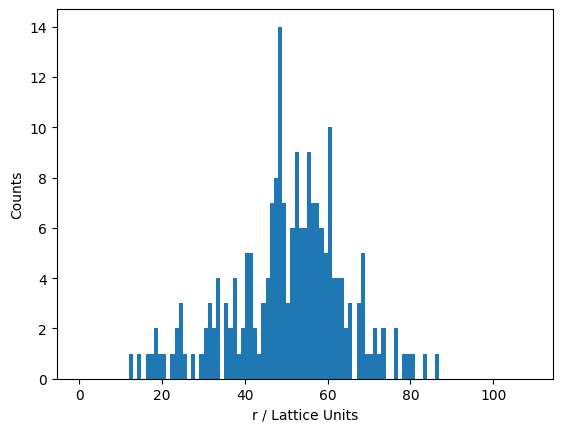

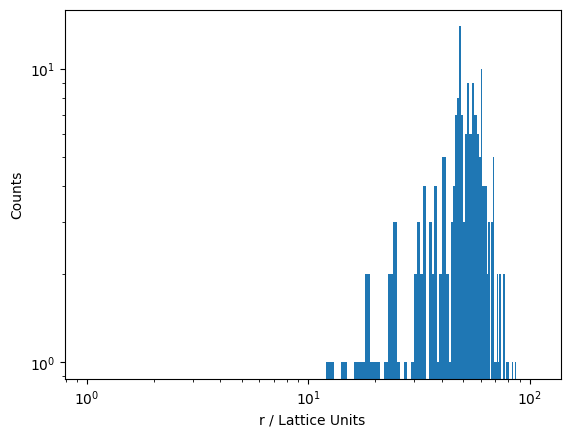

1102000000


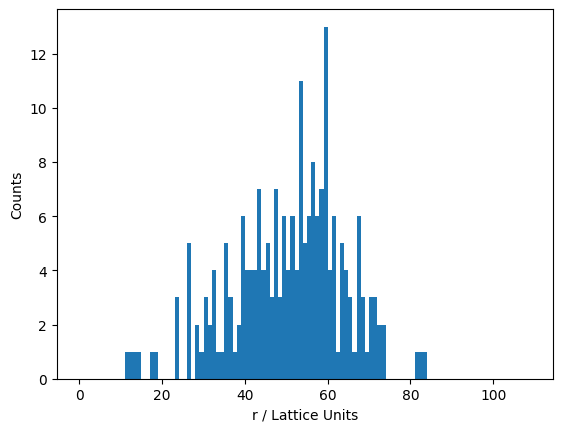

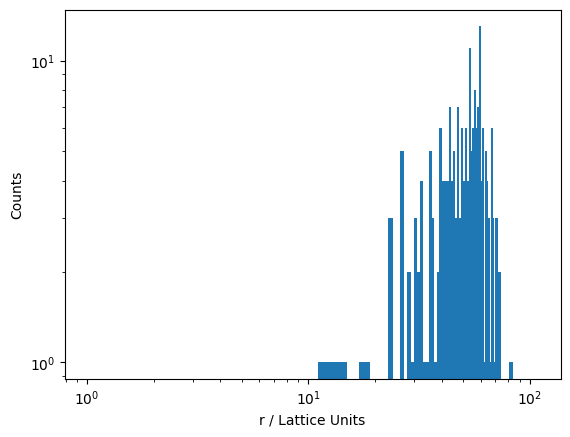

1122000000


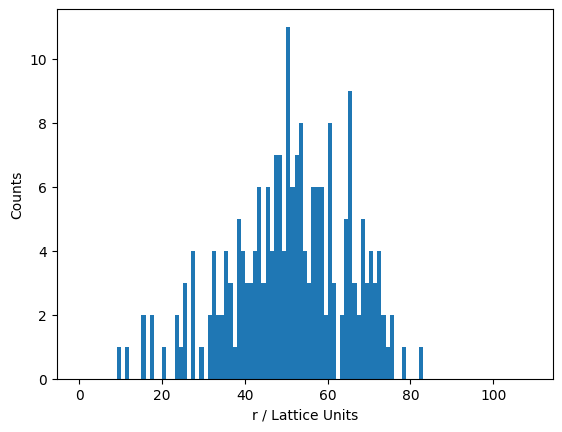

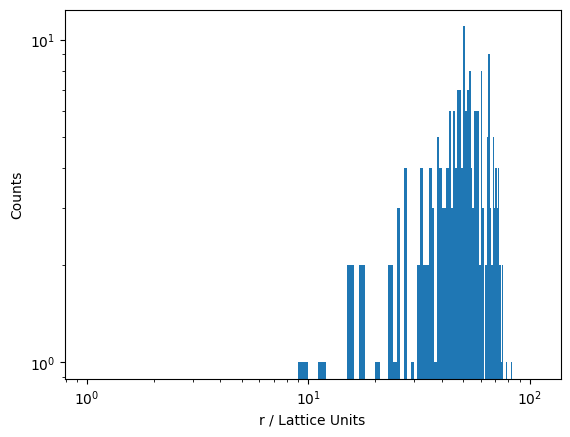

1142000000


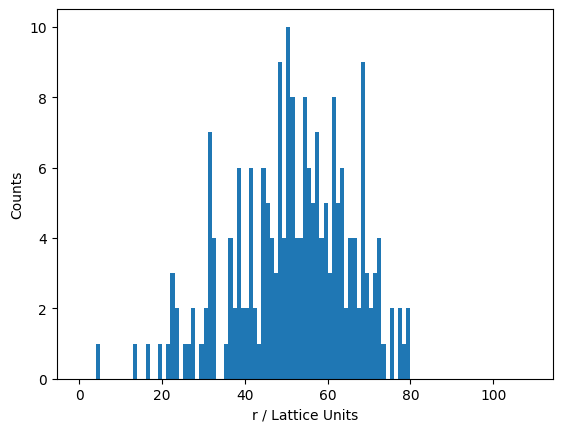

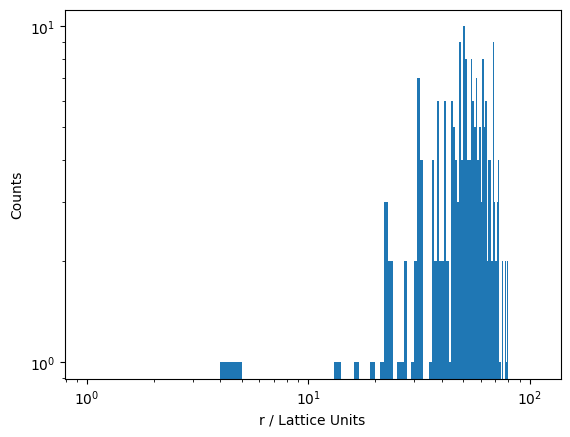

1162000000


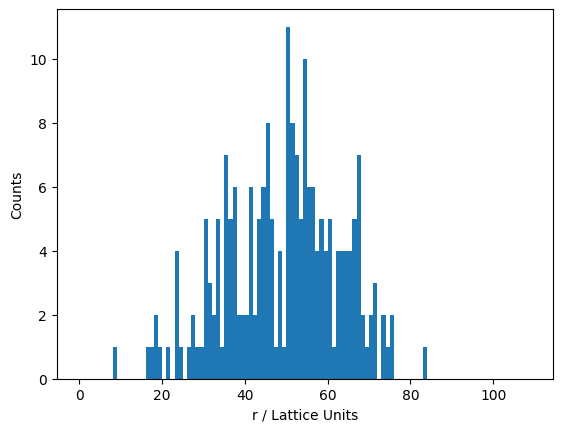

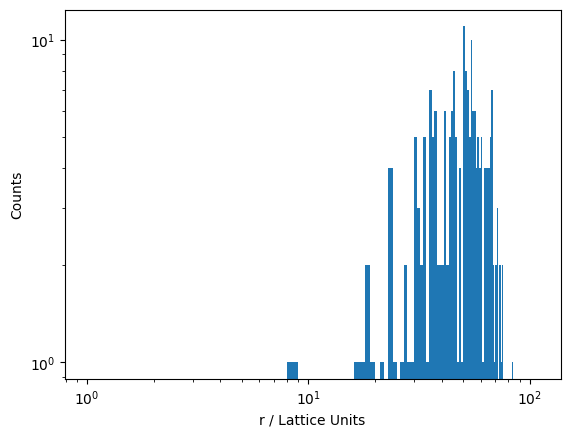

1182000000


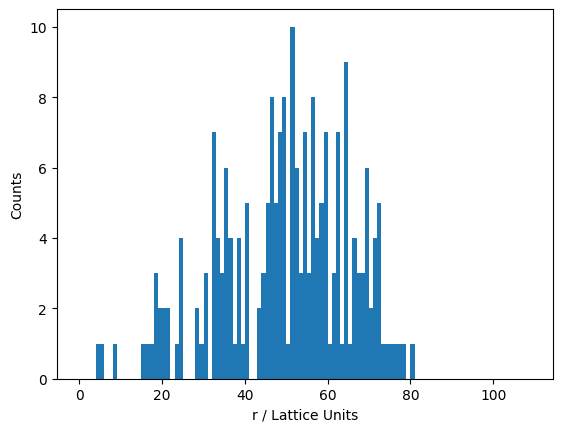

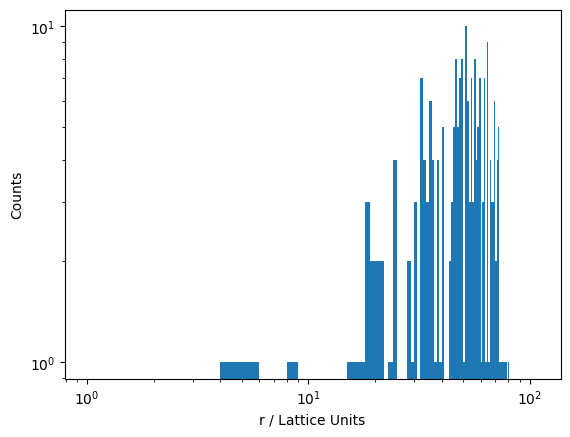

1202000000


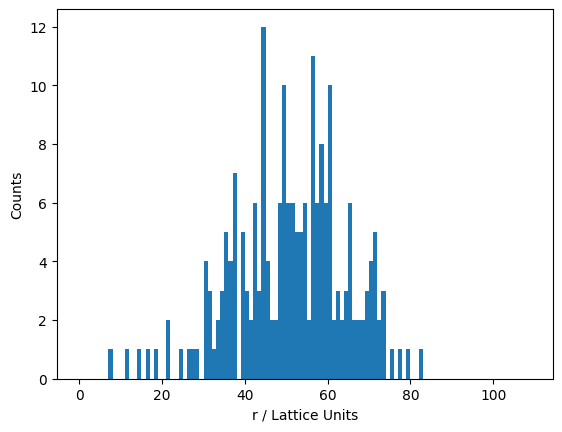

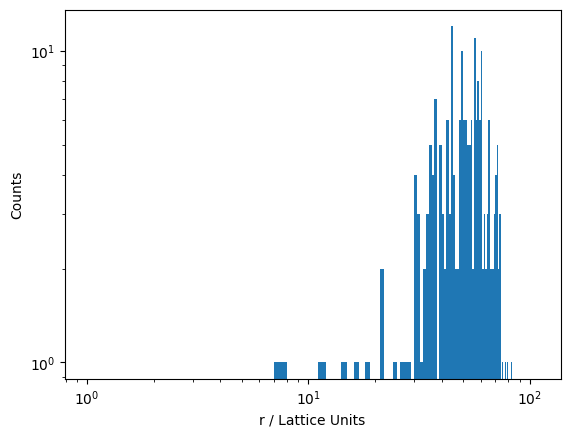

1222000000


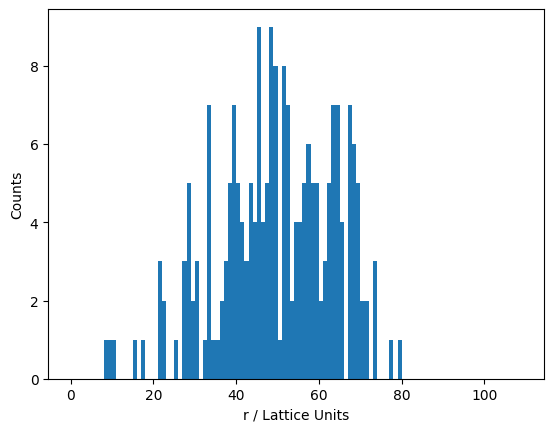

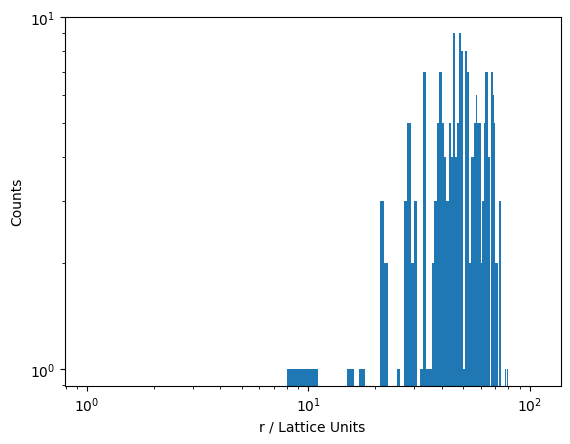

1242000000


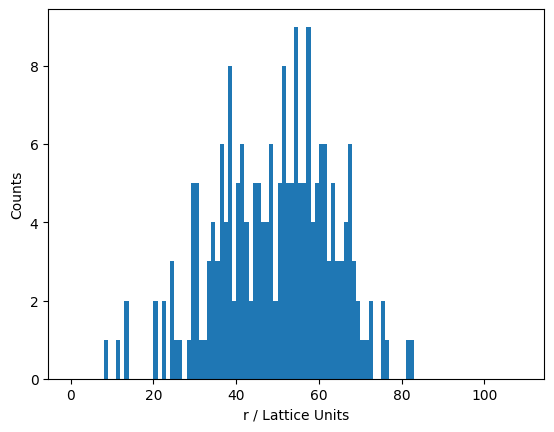

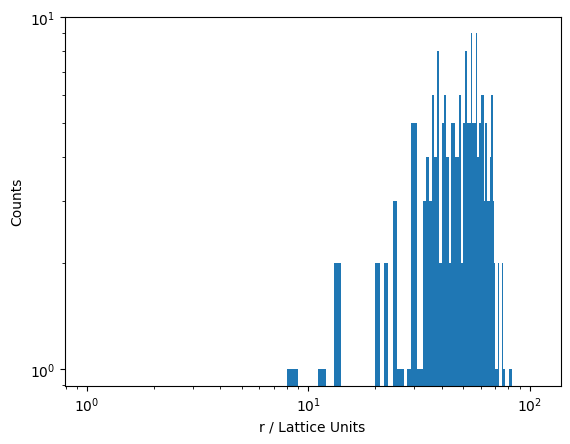

1262000000


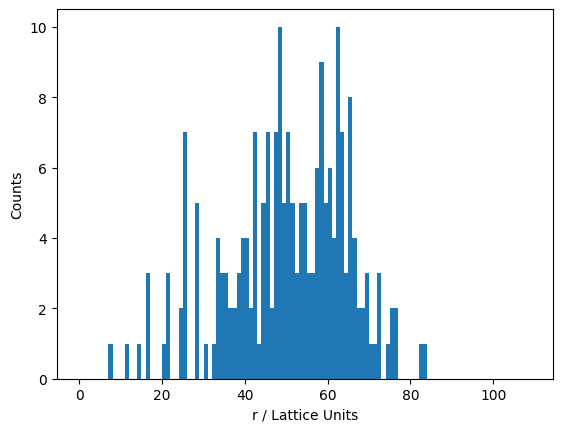

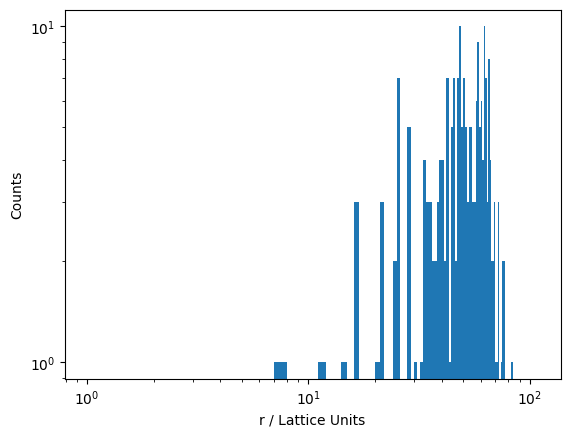

1282000000


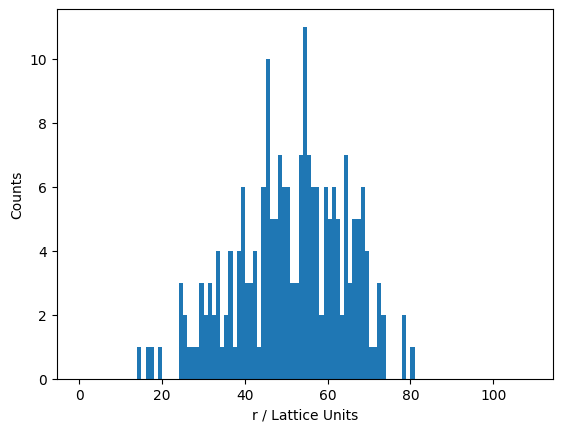

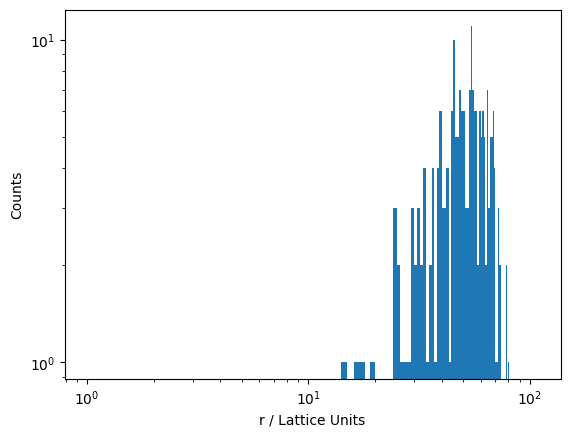

1302000000


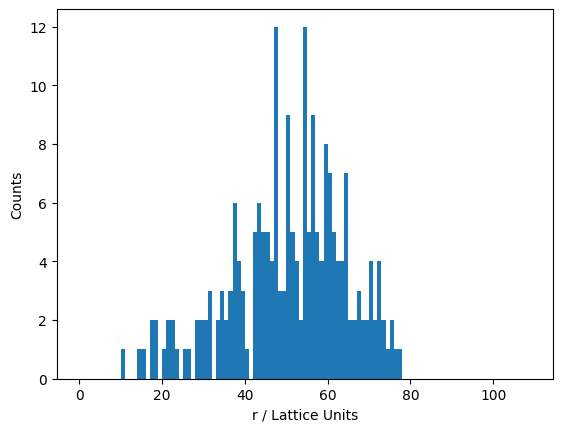

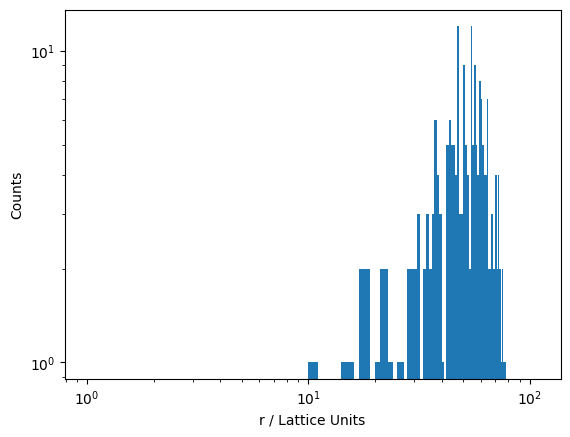

1322000000


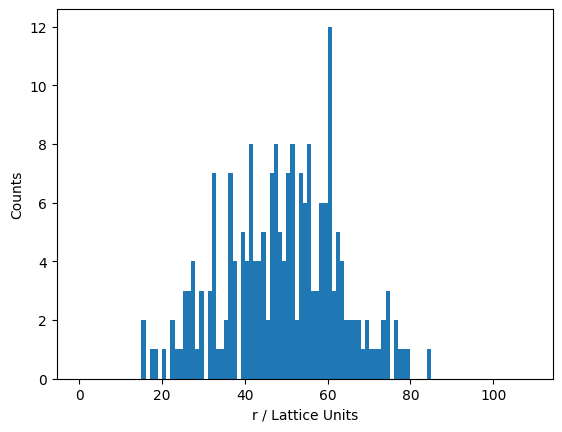

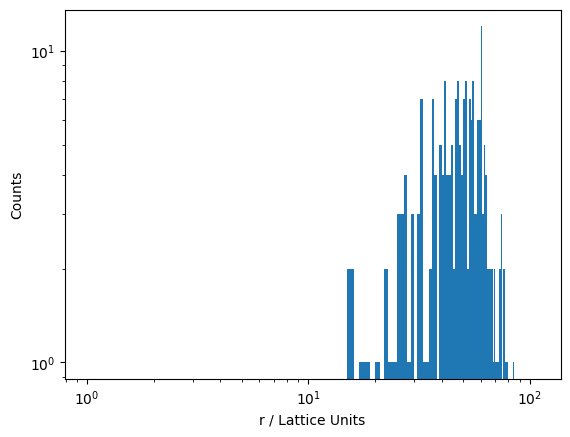

1342000000


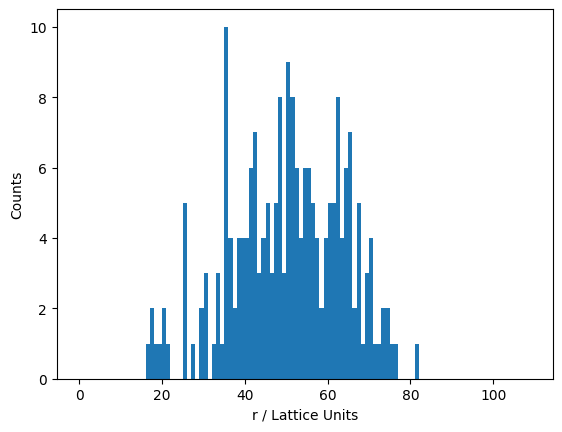

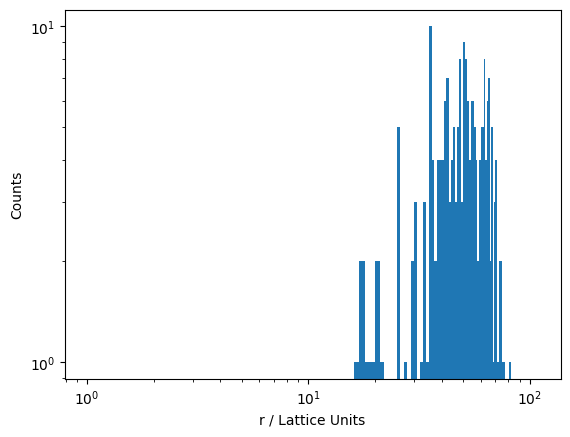

1362000000


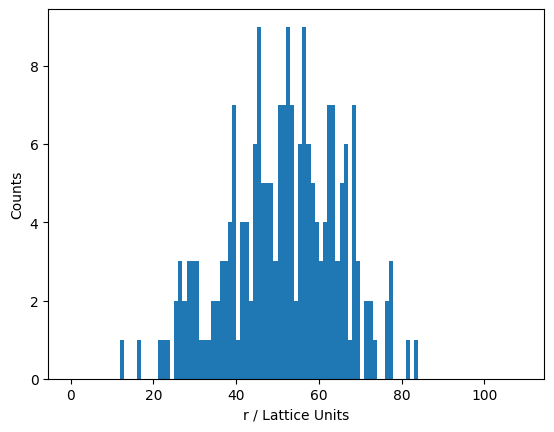

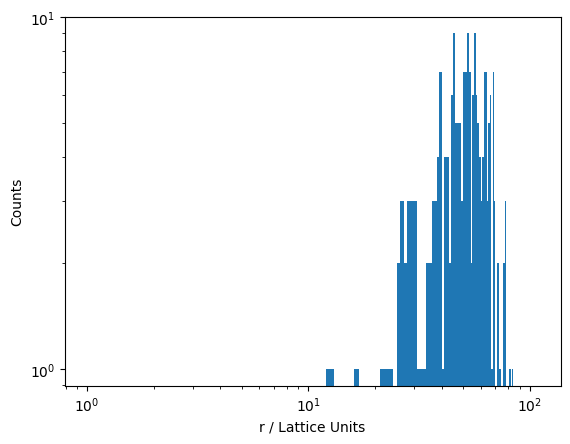

1382000000


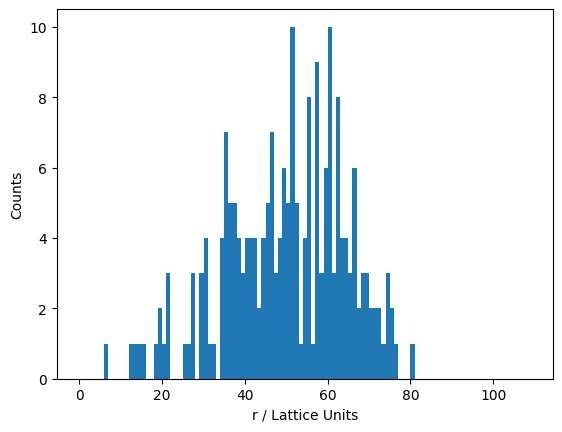

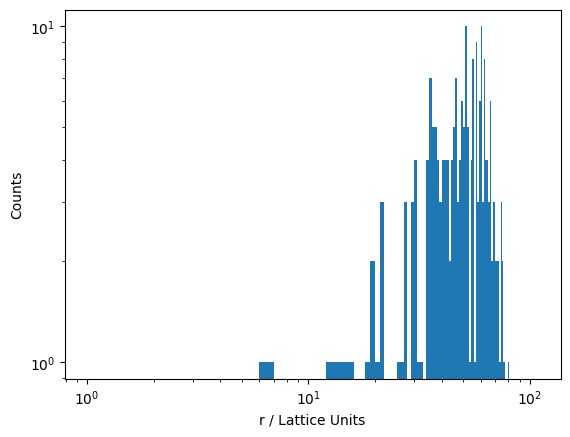

1402000000


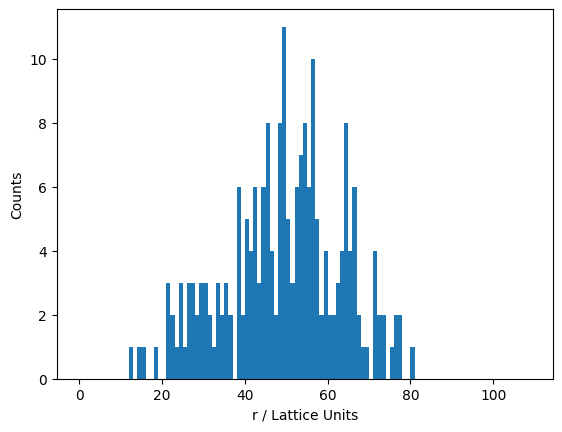

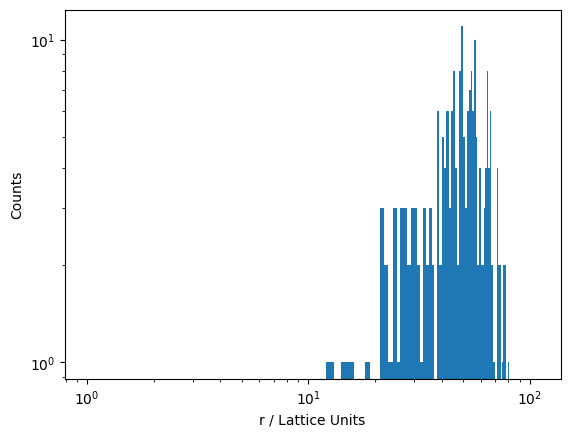

1422000000


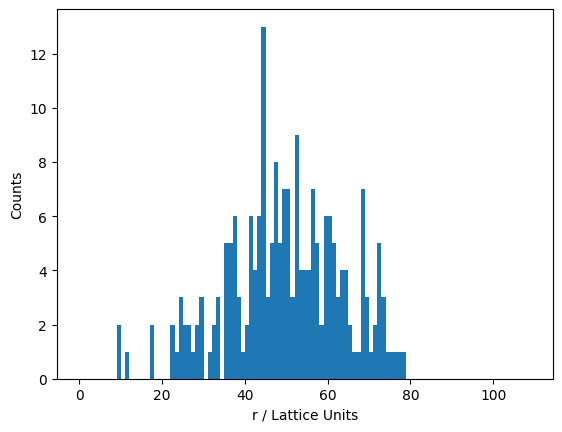

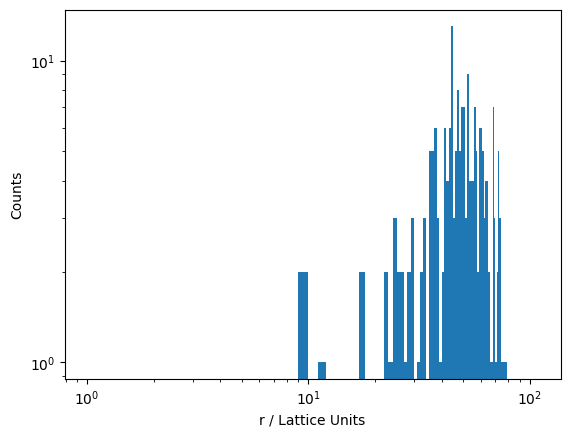

1442000000


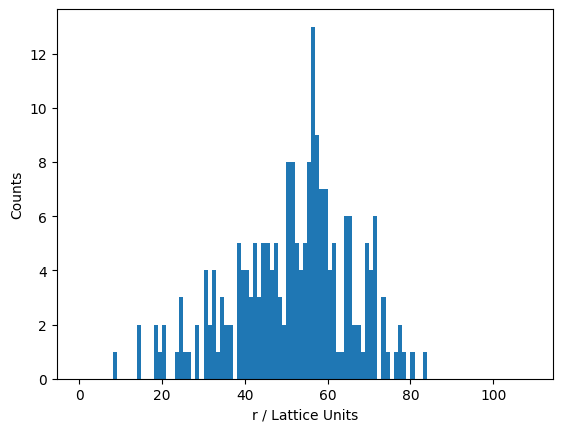

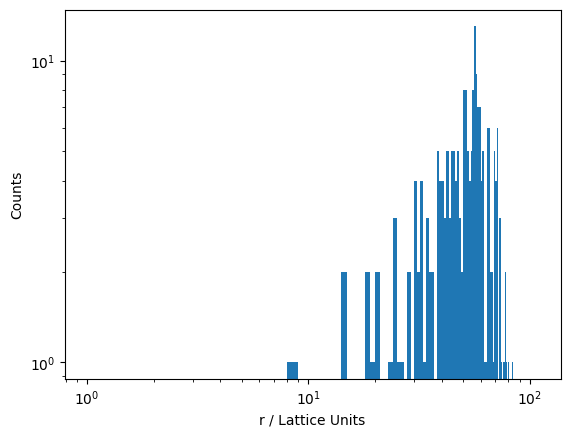

1462000000


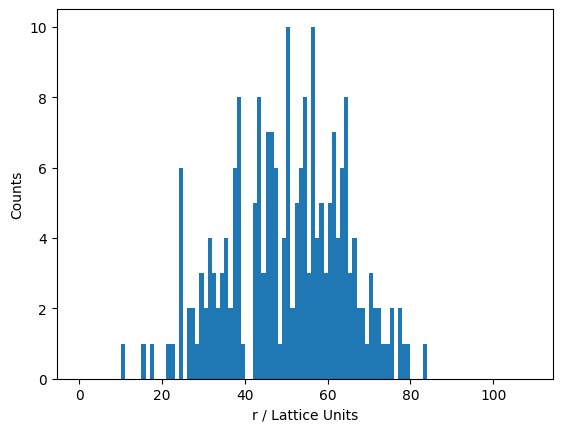

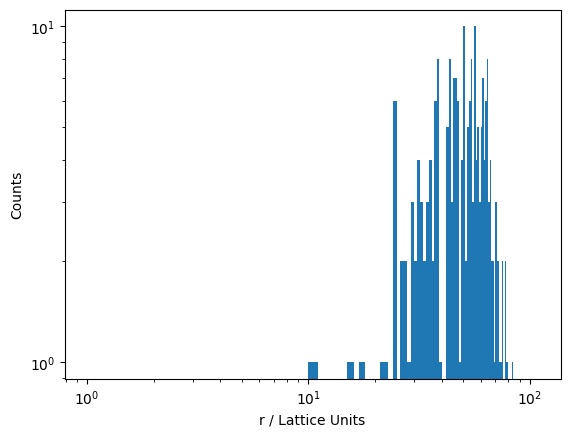

1482000000


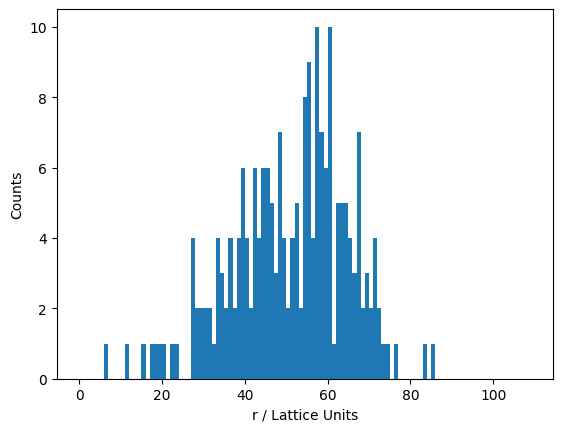

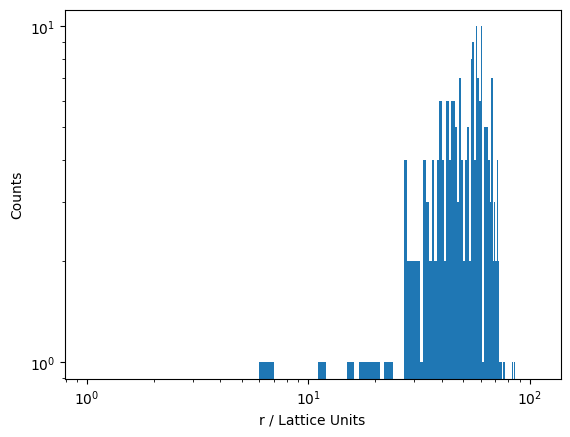

1502000000


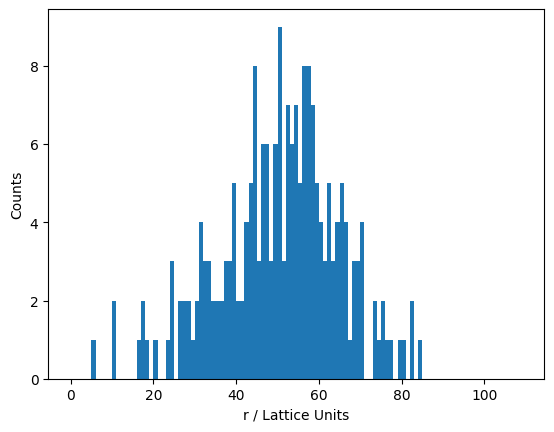

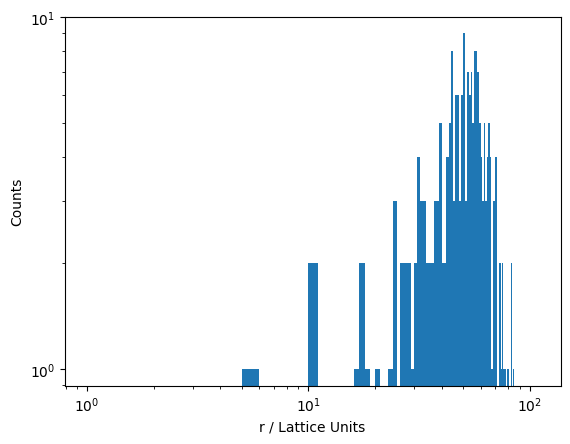

1522000000


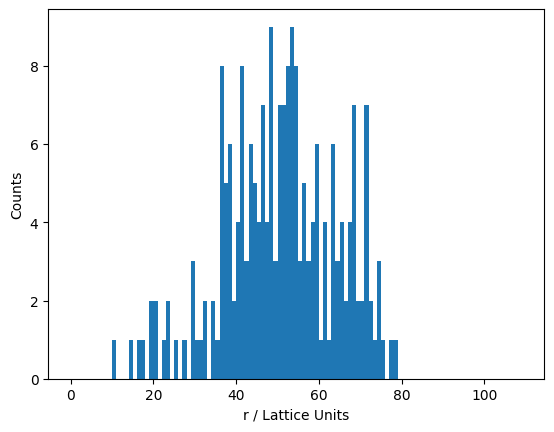

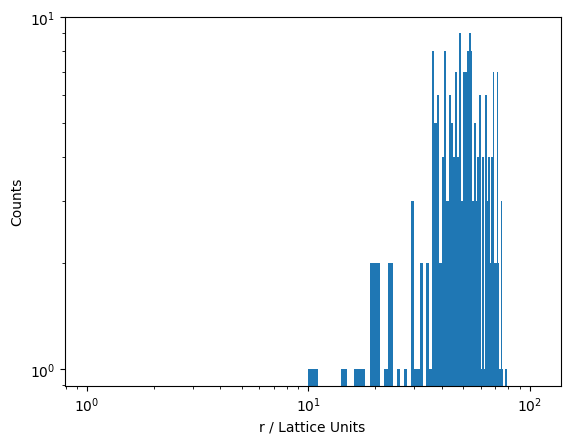

1542000000


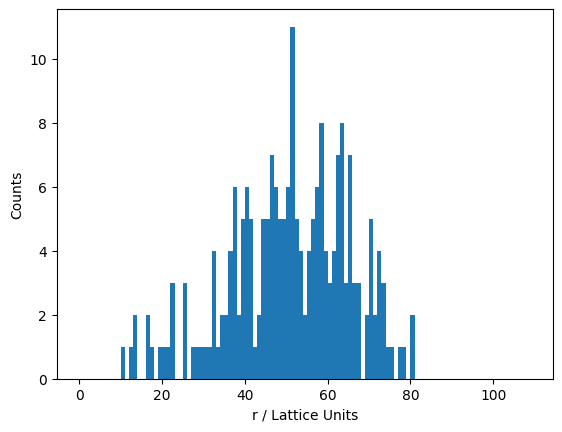

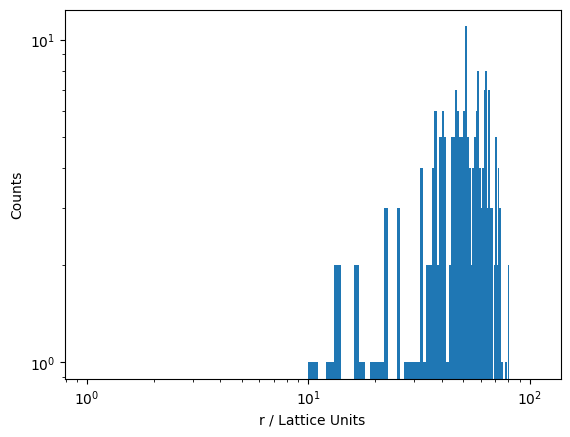

1562000000


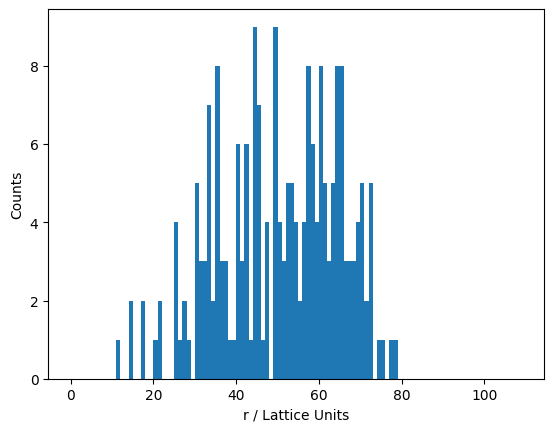

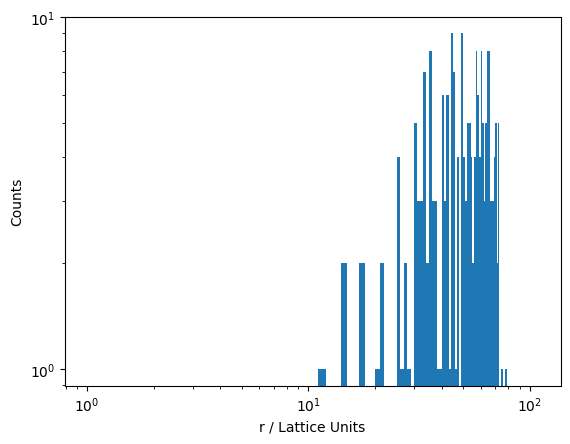

1582000000


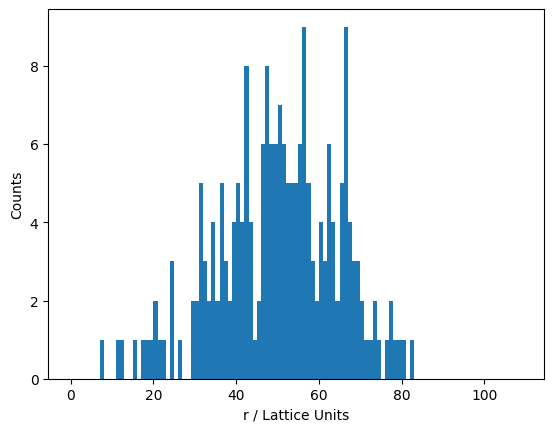

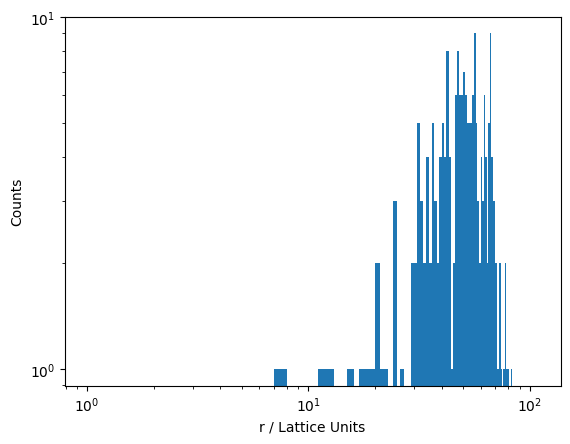

1602000000


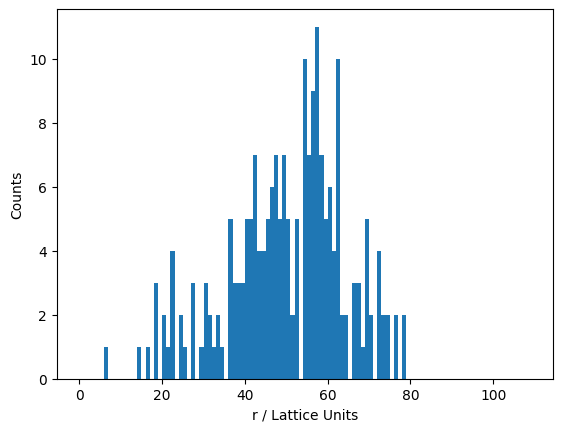

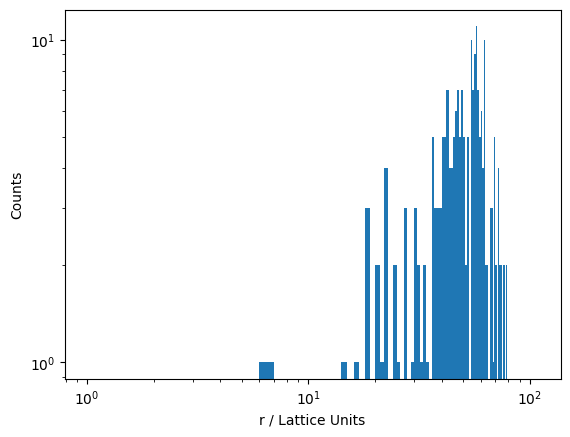

In [ ]:
loc_no_E = 'NO_E'
path = f'/content/drive/MyDrive/A_132/{loc_no_E}/results_trj.lammpstrj'

all_distances_NO_E = []
times = []
for i in range(60):
    time = 422000000 + i * 20000000
    times.append(time)
print(times)
particle_counts_dict = {}
for i, t in enumerate(times):
  print(t)
  x_coords, y_coords, z_coords = [], [], []
  start_processing = False
  with open(path, 'r') as file:
    for line in file:
        if line.startswith('ITEM: TIMESTEP'):
          timestep_value = next(file).strip()

          if timestep_value == str(t):
            start_processing = True
          else:
            start_processing = False
            continue

        if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
          continue

        if start_processing:
          items = line.split()
          if len(items) >= 7:
            x_coords.append(float(items[3]))
            y_coords.append(float(items[4]))
            z_coords.append(float(items[5]))

  x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
  coordinates = np.column_stack((x_coords, y_coords, z_coords))
  center = np.array([60, 60, 60])
  # Calculate distances for the current run

  chunk_size = 132
  num_chunks = len(coordinates) // chunk_size
  coordinates_reshaped = coordinates[:num_chunks * chunk_size].reshape((num_chunks, chunk_size, 3))

  averaged_coordinates_NO_E = np.mean(coordinates_reshaped, axis=1)
  distances_NO_E = np.linalg.norm(averaged_coordinates_NO_E - center, axis=1)
  distances_NO_E = np.abs(distances_NO_E)
  all_distances_NO_E.extend(distances_NO_E)
  #distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)
  plt.hist(distances_NO_E, bins=np.arange(0, 110))
  plt.xlabel('r / Lattice Units')
  plt.ylabel('Counts')
  #plt.title(f'Temperature: {temp_label}')
  #plt.title(f'No Interaction Energy')
  #plt.savefig('histogram_av_NO_E.png')
  plt.show()
  plt.hist(distances_NO_E, bins=np.arange(0, 110))
  plt.yscale('log')
  plt.xscale('log')
  plt.xlabel('r / Lattice Units')
  plt.ylabel('Counts')
  #plt.title(f'Temperature: {temp_label}')
  #plt.title(f'No Interaction Energy')
  #plt.savefig('histogram_av_NO_E.png')
  plt.show()

In [ ]:
path = f'/content/drive/MyDrive/A_132/NO_E'
%cd $path

/content/drive/MyDrive/A_132/NO_E


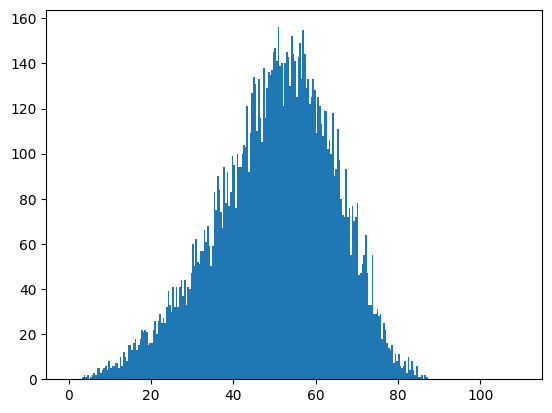

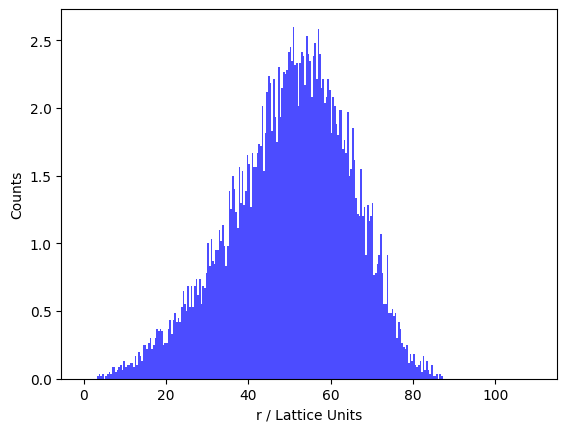

In [ ]:
counts, edges, _ = plt.hist(all_distances_NO_E, bins=np.arange(0, 110, 0.4))
plt.show()
normalized_counts_NO_E = counts / 60
plt.bar(edges[:-1], normalized_counts_NO_E, width=np.diff(edges), align='edge', color='blue', alpha=0.7)
#plt.title('No Interaction Energy')
plt.xlabel('r / Lattice Units')
plt.ylabel('Counts')
plt.savefig('D_histogram_av_NO_E.png')
plt.show()

In [ ]:
loc_no_E = '100.0'
path = f'/content/drive/MyDrive/A_132/{loc_no_E}/results_trj.lammpstrj'

all_distances = []
times = []

for i in range(5):
    time = 2000000000 + i * 200000000 + 2000000
    times.append(time)
particle_counts_dict = {}

for i, t in enumerate(times):
  print(t)
  x_coords, y_coords, z_coords = [], [], []
  start_processing = False
  with open(path, 'r') as file:
    for line in file:
        if line.startswith('ITEM: TIMESTEP'):
          timestep_value = next(file).strip()

          if timestep_value == str(t):
            start_processing = True
          else:
            start_processing = False
            continue

        if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
          continue

        if start_processing:
          items = line.split()
          if len(items) >= 7:
            x_coords.append(float(items[3]))
            y_coords.append(float(items[4]))
            z_coords.append(float(items[5]))

  x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
  coordinates = np.column_stack((x_coords, y_coords, z_coords))
  center = np.array([60, 60, 60])
  # Calculate distances for the current run

  chunk_size = 132
  num_chunks = len(coordinates) // chunk_size
  coordinates_reshaped = coordinates[:num_chunks * chunk_size].reshape((num_chunks, chunk_size, 3))

  averaged_coordinates = np.mean(coordinates_reshaped, axis=1)
  distances = np.linalg.norm(averaged_coordinates - center, axis=1)
  distances = np.abs(distances)
  all_distances.extend(distances)

2002000000
2202000000
2402000000
2602000000
2802000000


In [ ]:
print(normalized_counts_NO_E)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.01666667 0.03333333 0.01666667 0.03333333
 0.         0.01666667 0.03333333 0.05       0.03333333 0.08333333
 0.08333333 0.05       0.06666667 0.08333333 0.1        0.06666667
 0.13333333 0.08333333 0.1        0.1        0.11666667 0.11666667
 0.08333333 0.16666667 0.1        0.2        0.16666667 0.13333333
 0.25       0.25       0.21666667 0.26666667 0.3        0.21666667
 0.25       0.3        0.36666667 0.35       0.36666667 0.35
 0.25       0.26666667 0.26666667 0.36666667 0.43333333 0.33333333
 0.43333333 0.48333333 0.41666667 0.45       0.41666667 0.53333333
 0.65       0.55       0.5        0.68333333 0.53333333 0.68333333
 0.53333333 0.68333333 0.73333333 0.61666667 0.73333333 0.55
 0.68333333 0.66666667 0.78333333 1.         0.83333333 1.03333333
 0.86666667 0.85       0.95       0.95       1.1        1.01666667
 1.13333333 0.98333333 0.83333333 0.98333333 1.38333333 1.25
 1.5        1.4      

In [ ]:
total_counts = sum(normalized_counts_NO_E)
print(total_counts)


209.0


In [ ]:
path = f'/content/drive/MyDrive/A_132/100.0'
%cd $path

/content/drive/MyDrive/A_132/100.0


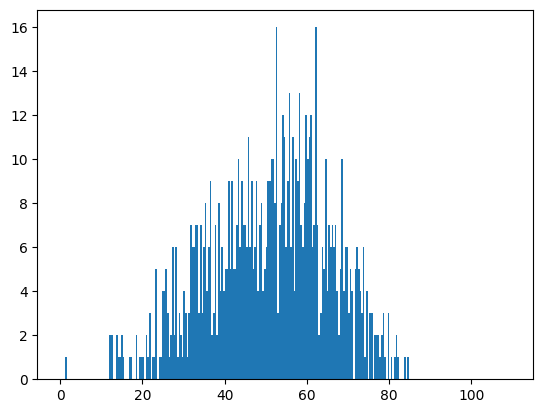

In [ ]:
counts_1, edges, _ = plt.hist(all_distances, bins=np.arange(0, 110, 0.4))
normalized_counts = counts_1 / 5 # Divide each count by 5

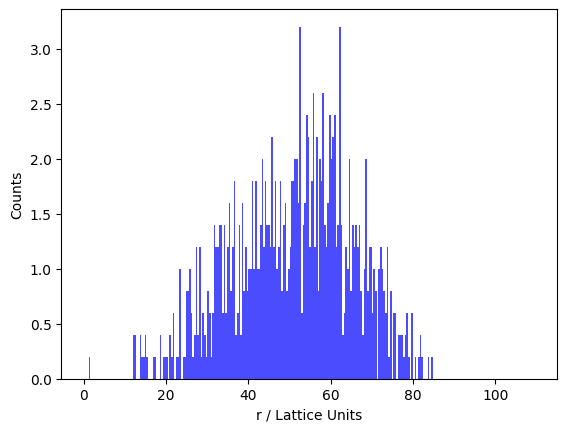

In [ ]:
plt.bar(edges[:-1], normalized_counts, width=np.diff(edges), align='edge', color='blue', alpha=0.7)
plt.xlabel('r / Lattice Units')
plt.ylabel('Counts')
plt.savefig('D_histogram.png')
plt.show()


<ipython-input-13-f14718f805f9>:1: RuntimeWarning: divide by zero encountered in divide
  ratio_counts = normalized_counts / normalized_counts_NO_E
<ipython-input-13-f14718f805f9>:1: RuntimeWarning: invalid value encountered in divide
  ratio_counts = normalized_counts / normalized_counts_NO_E


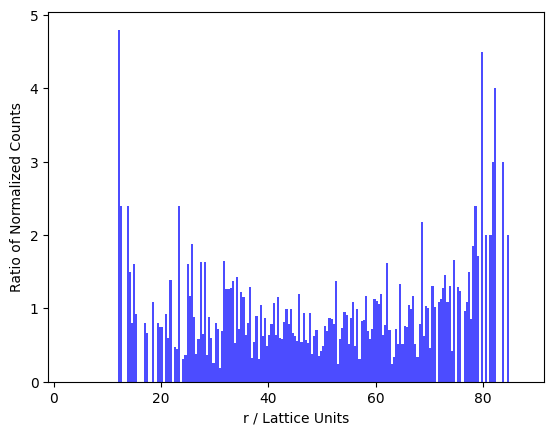

In [ ]:
ratio_counts = normalized_counts / normalized_counts_NO_E
plt.bar(edges[:-1], ratio_counts, width=np.diff(edges), align='edge',color='blue', alpha=0.7)
#plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('r / Lattice Units')
plt.ylabel('Ratio of Normalized Counts')
#plt.ylim(0, 5)
#plt.text(82, 2, 'y = 1', color='black')
plt.savefig('D_histogram_ratio.png')
plt.show()

<ipython-input-80-8354f1e10902>:1: RuntimeWarning: divide by zero encountered in divide
  ratio_counts = normalized_counts / normalized_counts_NO_E
<ipython-input-80-8354f1e10902>:1: RuntimeWarning: invalid value encountered in divide
  ratio_counts = normalized_counts / normalized_counts_NO_E


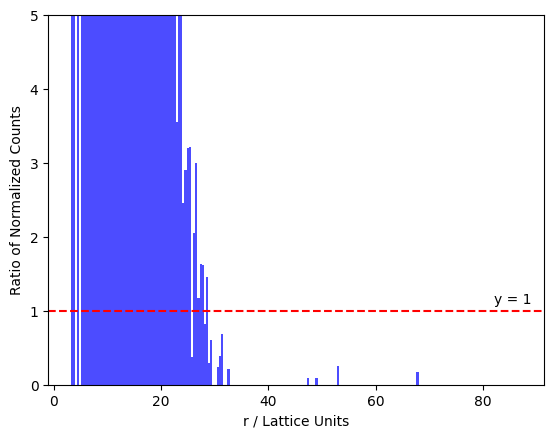

In [ ]:
ratio_counts = normalized_counts / normalized_counts_NO_E
plt.bar(edges[:-1], ratio_counts, width=np.diff(edges), align='edge', color='blue', alpha=0.7)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('r / Lattice Units')
plt.ylabel('Ratio of Normalized Counts')
plt.ylim(0, 5)
plt.text(82, 1.1, 'y = 1', color='black')
plt.savefig('D_histogram_ratio_zoom.png')
plt.show()